<a href="https://colab.research.google.com/github/tchamna/LLM-Under-Ressourced-Languages/blob/main/Dictionnaire_Nufi_Tchamna_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# ntō' làh
# ncāk làh

Mounted at /content/drive


In [ ]:
# dict_replace = {"à":"à","á":"á", "ǎ":"ǎ", "â":"â", "è":"è", "é":"é", "ě":"ě", "ê":"ê", 
#                 "ì":"ì", "í":"í", "î":"î", "ò":"ò", "ó":"ó", "ǒ":"ǒ", "ô": "ô",
#                 "ù":"ù", "ú":"ú", "ǔ":"ǔ","û":"û"}

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

## Getting data from text file

In [ ]:
import pandas as pd

# with open("/content/drive/MyDrive/Data_Science/DataSets/Nufi/Liste_phrases_extraites_du_dictionnaire_nufi_Tchamna.txt","r") as f:
#   ff = f.readlines()

# df = pd.DataFrame(ff,columns=["Nufi:Francais"])
path_file = "/content/drive/MyDrive/Data_Science/DataSets/Nufi/nufi_dict_meanings.txt"

# path_file = "/content/drive/MyDrive/Data_Science/DataSets/Nufi/liste_nufi_sentences_phrases.txt"



with open(path_file,"r") as f_m:
  ff_m = f_m.readlines()
nufi_examples_df = pd.DataFrame(ff_m,columns=["Meaning"])

# with open("/content/mbouda_conte.txt","r") as f_m:
#   ff_m = f_m.readlines()
# nufi_examples_df = pd.DataFrame(ff_m,columns=["Meaning"])



# Extract Sentences between delimiters

In [ ]:
import re

line = "pl. nkhù; ex. túkhù : litt., la tête du pied; l'orteil; ex. ntúnkhù : les orteils; ex. pǐkhù : la cuisse. <tag_bullet> <br> 2– <tag_def> le pas, le rythme, la cadence; ex. khǔnàk : l'allure: le rythme, la cadence musicale; ex. ncōp khù : accoucher un enfant de sexe opposé lors du prochain accouchement;  ywà."
line = line.replace(": <tag_ trad>",":")
line = line.replace("<tag_trad>",":")
line = " ".join(line.split())
nufi_examples_ = list(line.split(" "))
# print(nufi_examples_)
forbidden = ["Pdm", "ODL", "grammaire","signif","Anto.","anto."] # A Exclure les phrase contenant ces caracteres
nufi_examples_2 =  [s for s in nufi_examples_ if not any(x in s for x in forbidden)]
# print(nufi_examples_2)

# nufi_examples_[0] in [":","1","2","3","4","5","6","7","8","9",")","(","."]
# line_list = re.split('ex. |;', line)

delim = "ex\.|Ex\.|syn\.|;|<tag_bullet>|<br>|>|<|cf\.|–"
ll = re.split(delim, line)
ll
# nufi_examples = [i for i in line_list if ":" in i ]


['pl. nkhù',
 ' ',
 ' túkhù : litt., la tête du pied',
 " l'orteil",
 ' ',
 ' ntúnkhù : les orteils',
 ' ',
 ' pǐkhù : la cuisse. ',
 ' ',
 ' 2',
 ' ',
 'tag_def',
 ' le pas, le rythme, la cadence',
 ' ',
 " khǔnàk : l'allure: le rythme, la cadence musicale",
 ' ',
 ' ncōp khù : accoucher un enfant de sexe opposé lors du prochain accouchement',
 ' ywà.']

In [ ]:

def get_sentences_between_delimiters(Nufi,delimiters = "ex.|;"):   
  import re
 
  nufi_examples_vect = []
  for k in range(len(Nufi)):    
    sentence_nufi = Nufi.iloc[k][0].strip()
    sentence_nufi = " ".join(sentence_nufi.split())
    
    sentence_nufi = sentence_nufi.replace(": <tag_ trad>",": ")
    sentence_nufi = sentence_nufi.replace(": <tag_def>",": ")  
    sentence_nufi = sentence_nufi.replace("<tag_trad>",":")  

    
    # Règle de grammaire :  
    
    sentence_nufi_list = re.split(delimiters, sentence_nufi)
    # print(sentence_nufi_list)
    nufi_examples = [i for i in sentence_nufi_list if ":" in i and len(i) !=0 ]
    


    nufi_examples_vect.append(nufi_examples)

  return nufi_examples_vect

delim = "ex\.|Ex\.|syn\.|;|<tag_bullet>|<br>|>|<|cf\.|–" # The | stands for the logical operator OR. 
# Cautious. If you dont put anything behing the | it will split on everything!
nufi_examples_list_of_lists = get_sentences_between_delimiters(nufi_examples_df,delim)



# Forbidden: Eliminate sentences that contain ...:


In [ ]:
nufi_examples_list_of_lists_flattened = [ i[j]  for i in nufi_examples_list_of_lists for j in range(len(i))]

 # A Exclure les phrase contenant ces caracteres

def forbidden_containing(data,forbidden = ["Pdm", "ODL", "grammaire","signif","href","anto."]):    
  data =  [s for s in data if not any(x in s for x in forbidden)]
  return data

forbidden = ["Pdm", "ODL", "grammaire","signif","href","anto."]
nufi_examples_list_of_lists_flattened2 = forbidden_containing(nufi_examples_list_of_lists_flattened,forbidden)

def forbidden_start_with(data,forbidden_start = ":"):
 
  N = len(forbidden_start)

  data = [i for i in data if i.strip().lower()[0:N] not in forbidden_start]
  return data

forbidden_start_ = [":","1","2","3","4","5","6","7","8","9",")","(",".","-",",","litt"]

for elt in forbidden_start_:
  nufi_examples_list_of_lists_flattened2  = forbidden_start_with(nufi_examples_list_of_lists_flattened2,elt)

nufi_examples_list_of_lists_flattened3 = nufi_examples_list_of_lists_flattened2

# def replace_starting_sent_by(data:list,start_chr = ("nàh","làh")):     
#   #Remove Words that start by nàh, by làh, bàt, by pàt
#   data = [i.strip().lower()[0:len(start_chr[0])].replace(start_chr[0],start_chr[1]) + i.strip().lower()[len(start_chr[0]):] for i in data]
#   data = pd.DataFrame(data,columns=["Nufi:Francais"])
#   return data

# start_chr = {"nàh":"làh","bàt":"pàt","cīcō'ò":"cʉ̄cō'ò"}
# for i in start_chr:
#   nufi_examples_list_of_lists_flattened3 = replace_starting_sent_by(nufi_examples_list_of_lists_flattened3,(i,start_chr[i]))

# # sent_start_with(nufi_examples_list_of_lists_flattened3,"bàt")

df_nufi = nufi_examples_list_of_lists_flattened3

# sent_start_with(df_nufi,"litt")


# Replace Sentence Endting With, by:




In [ ]:
def replace_ending_sent_by(data:list,end_chr = {",":""},N = 1):
  
  for elt in end_chr:
    #Remove trailing comma. In other word, Relace sentences ending with comma(,) by ""
    data = [i.strip()[0:-N]+i.strip()[-N:].replace(",","") for i in data]
    # data = [i[0:-1].strip()+i[-1].strip().replace(",","") for i in data]
  df_nufi = pd.DataFrame(data,columns=["Nufi:Francais"])
  return df_nufi

end_chr = {",":""}
df_nufi = replace_ending_sent_by(nufi_examples_list_of_lists_flattened3,end_chr)
df_nufi


,Nufi:Francais
0,kā' : l'assiette
1,"kà' : la médecine, la magie"
2,ǎ pʉ́ɑ́' : il a cassé
3,ǎ pʉ́ɑ́ : il est devenu fou
4,ǒ sì kāāsī : ne te balade pas
...,...
15626,Ngòòsōk : Ngòòzōk
15627,Nkwèēmbū'/Nkwèēnkām : Njampìì/Nzhīɛ̄pī
15628,Tìēngà' : Tìēngà'
15629,Nā'njə̀ : Nkōngʉ̀ɑ̀


In [ ]:
# data = ["alompo"]

# for i in data:
#   begin_chars = i[0:-N]
#   last_chars = i[-N:]
#   print('Last 3 character : ', begin_chars,last_chars)

#   [begin_chars.strip()+last_chars.strip().replace(",","") for i in data]



# Replace Sentence Starting With, by:




In [ ]:

def replace_starting_sent_by(data:list,start_chr = ("nàh","làh")):     
  #Remove Words that start by nàh, by làh, bàt, by pàt
  data = [i.strip().lower()[0:len(start_chr[0])].replace(start_chr[0],start_chr[1]) + i.strip().lower()[len(start_chr[0]):] for i in data]
  return data

start_chr = {"nàh":"làh","bàt":"pàt","cīcō'ò":"cʉ̄cō'ò"}
for i in start_chr:
  nufi_examples_list_of_lists_flattened3 = replace_starting_sent_by(nufi_examples_list_of_lists_flattened3,(i,start_chr[i]))

# sent_start_with(nufi_examples_list_of_lists_flattened3,"bàt")
df_nufi = pd.DataFrame(nufi_examples_list_of_lists_flattened3,columns=["Nufi:Francais"])


# Upper case only initial letter of a string, NOT lowering other characteres

In [ ]:
df_nufi = df_nufi.applymap(lambda x: x.strip())
df_nufi = df_nufi.applymap(lambda x: x[0].upper() + x[1:])

# mask = df_nufi["Nufi:Francais"].str.contains("Tchamna")
# df_nufi[mask]



# Sort DataFrame

In [ ]:
df_nufi = df_nufi.drop_duplicates()

df_nufi_sorted_len = df_nufi.sort_values(by="Nufi:Francais", key=lambda x: x.str.len())
df_nufi_sorted_alphabet = df_nufi.sort_values(by="Nufi:Francais")

df_nufi_sorted_len = df_nufi_sorted_len.reset_index(drop=True)
df_nufi_sorted_len


,Nufi:Francais
0,A = b :
1,Sēn: ami
2,"Mɑ̀ : à,"
3,Sê : ici
4,Ǹ : je.
...,...
12024,"Cāt tōō lɑ́ mbàk wɑ̄, cāt tōō lɑ́ mbàk wɑ̄, ng..."
12025,"Táàfʉ̀, litt., père du roi, vient généralement..."
12026,Ce caractère sacré qu'on attribuait à la plant...
12027,"Cwè' pɑ̀mɑ́fʉ̀ : fʉ̌ mbɑ̄ tɑ̀ mbīē, nzhī ndēn ..."


In [ ]:
# sent_end_with(df_nufi_sorted_len,",")

In [ ]:
pip install xlsxwriter


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.7/152.7 kB 4.0 MB/s eta 0:00:00


In [ ]:
with pd.ExcelWriter('df_nufi.xlsx',engine='xlsxwriter') as writer:  # pip install xlsxwriter

    df_nufi.to_excel(writer, sheet_name='nufi_phrases')
    df_nufi_sorted_alphabet.to_excel(writer, sheet_name='nufi_sorted_alphabet')
    df_nufi_sorted_len.to_excel(writer, sheet_name='nufi_sorted_len')
    
# writer.save()

# Sentences Containing Words ending with a character: Nufi(Fe'efe'e)
Given a file containing many sentences, find all the sentences containing a word ending with a character "x"

## Defining functions

In [ ]:

# df_processed = nufi_examples_df.applymap(lambda x: x.replace("*","").split(":"))
# Nufi_ = df_processed.applymap(lambda x: x[0])


def word_end_with(Nufi,end_character = "b"):    
  sentences_containing_words_ending_with_ = []
  for k in range(len(Nufi)):    
    sentence_nufi = Nufi.iloc[k][0].strip()
    # sentence_nufi
    words_nufi = sentence_nufi.split()
    
    for i in words_nufi:
      if i.lower().endswith(end_character):
        sentences_containing_words_ending_with_.append(sentence_nufi)
        break  
        print(True)
  return sentences_containing_words_ending_with_

def word_start_with(Nufi,start_character = "b"):    
  sentences_containing_words_starting_with_ = []
  for k in range(len(Nufi)):    
    sentence_nufi = Nufi.iloc[k][0].strip()
    # sentence_nufi
    words_nufi = sentence_nufi.split()
    
    for i in words_nufi:
      if i.lower().startswith(start_character.lower()):
        sentences_containing_words_starting_with_.append(sentence_nufi)
        break  
        print(True)
  return sentences_containing_words_starting_with_

def word_start_with_at_least_n(Nufi,start_character = "b",n = 2):    
  sentences_containing_words_starting_with_ = []

  
  for k in range(len(Nufi)):    
    sentence_nufi = Nufi.iloc[k][0].strip()
    # sentence_nufi
    words_nufi = sentence_nufi.split()
    count = 0
    for i in words_nufi:
      if i.lower().startswith(start_character.lower()):
        
        count += 1
        
        if count >= n:
          sentences_containing_words_starting_with_.append(sentence_nufi)
          # break
    # print(count)   
  return sentences_containing_words_starting_with_

def word_end_with_at_least_n(Nufi,end_character = "b",n = 2):    
  sentences_containing_words_ending_with_ = []

  
  for k in range(len(Nufi)):    
    sentence_nufi = Nufi.iloc[k][0].strip()
    # sentence_nufi
    words_nufi = sentence_nufi.split()
    count = 0
    for i in words_nufi:
      if i.lower().endswith(end_character.lower()):
        
        count += 1
        
        if count >= n:
          sentences_containing_words_ending_with_.append(sentence_nufi)
          # break
    # print(count)   
  return sentences_containing_words_ending_with_



def sent_end_with(Nufi,end_character = "b"):    
  sentences_ending_with_ = []
  for k in range(len(Nufi)):    
    sentence_nufi = Nufi.iloc[k][0].strip()
    # sentence_nufi 
    if sentence_nufi.endswith(end_character):
      sentences_ending_with_.append(sentence_nufi)
      # break 
      # print(True)
  return sentences_ending_with_

def sent_start_with(Nufi,start_character = "b"):    
  sentences_starting_with_ = []
  for k in range(len(Nufi)):    
    sentence_nufi = Nufi.iloc[k][0].strip()
    # sentence_nufi 
    if sentence_nufi.startswith(start_character):
      sentences_starting_with_.append(sentence_nufi)
      # break 
      # print(True)
  return sentences_starting_with_


def sent_contain(Nufi,contain_character = "nàh"):    
  sentences_containing_words_containing_ = []
  for k in range(len(Nufi)):    
    sentence_nufi = Nufi.iloc[k][0].strip()
    # sentence_nufi
    words_nufi = sentence_nufi.split()
    
    for i in words_nufi:
      if contain_character in i:
        sentences_containing_words_containing_.append(sentence_nufi)
        break  
        print(True)
  return sentences_containing_words_containing_


# word_end_with(Nufi_,"e")
# nah = sent_contain(nufi_examples_df,"nàh")
# nah

## Preprocessing

In [ ]:

# with open("/content/drive/MyDrive/Data_Science/DataSets/Nufi/Liste_phrases_extraites_du_dictionnaire_nufi_Tchamna.txt","r") as f:
#   ff = f.readlines()

# df = pd.DataFrame(ff,columns=["Nufi:Francais"])

# with open("/content/drive/MyDrive/Data_Science/DataSets/Nufi/nufi_dict_meanings.txt","r") as f_m:
#   ff_m = f_m.readlines()
# df_m = pd.DataFrame(ff_m,columns=["Meaning"])

# df = df_m
# df.head().iloc[0:5:]

df = df_nufi

df_processed = df.applymap(lambda x: x.split(":"))


Nufi_ = df_processed.applymap(lambda x: x[0])
Nufi_ = Nufi_.applymap(lambda x: x.replace("\n",""))


Nufi_original = Nufi_.copy()

def sent_replace_x_by_y(Nufi, dict_bana_to_standard = {"nàh": "làh","ndə̀b": "ndòm","mɛ̀ɛ̀":"màà"}):    
  sentences_containing_words_containing_ = []
  vect_sentence_nufi = []
  vect_index = []
  for k in range(len(Nufi)):    
    sentence_nufi = Nufi.iloc[k][0].strip()
    # sentence_nufi
    words_nufi = sentence_nufi.split()
    words_nufi = words_nufi
    
    for i in words_nufi:

      # key = list(dict_bana_to_standard.keys())[1]

      for key in list(dict_bana_to_standard.keys()):
        # print(key, dict_bana_to_standard[key] )
        if key in i.lower():
          sentences_containing_words_containing_.append(sentence_nufi)
          sentence_nufi = sentence_nufi.replace(key,dict_bana_to_standard[key])
          sentence_nufi = sentence_nufi.replace(key.upper(),dict_bana_to_standard[key].upper())
          Nufi.iloc[k][0] = sentence_nufi
          # print(k)
          vect_index.append(k)
          
        # break  
  return Nufi, sentences_containing_words_containing_, vect_index

# word_end_with(Nufi_,"e")
# nah = sent_contain(Nufi_,"nàh")
dict_bana_to_standard_one_chr = {"ɛ̀" : "à", "έ" : "á", "ɛ̄" : "ā", "ɛ̌" : "ǎ", "ɛ̂" : "â"}
dict_ton_bas = {"à" : "a", "ɑ̀" : "ɑ", "è" : "e", "ɛ̀" : "ɛ̀", "ə̀" : "ə","ì" : "i", "ò" : "o","ɔ̀" : "ɔ", "ù" : "u","ʉ̀" : "ʉ", "ù" : "u","ǹ" : "n", "m̀" : "m","ŋ̀" : "ŋ"}
dict_bana_to_standard_two_chr = { "ə̀b" : "òm", "ə́b" : "óm", "ə̄b" : "ōm", "ə̌b" : "ǒm", "ə̂b" : "ôm", "ə̀h" : "ɑ̀h", "ə́h" : "ɑ́h", "ə̄h" : "ɑ̄h", "ə̌h" : "ɑ̌h", "ə̂h" : "ɑ̂h"}
dict_bana_to_standard_three_chr = { "cīcō'ò":"cʉ̄cō'ò", "mbə̀pə̄'":"pə̀pə̄'", "nàh" : "làh","Nàh" : "Làh","kòlə̀'":"kwèlè'", "èlɑ̀" : "ènɑ", "élɑ́" : "énɑ́", "ēlɑ̄" : "ēnɑ̄","Bàt":"Pàt","bàt":"pàt"}
dict_bana_to_standard_ab_am = {"àb":"àm","áb":"ám","āb":"ām","ǎb":"ǎm","âb":"âm"}
dict_reforme_nufi_Tchamna = {"èn":"ɛ̀n","én":"έn","ēn":"ɛ̄n","ěn":"ɛ̌n","ên":"ɛ̂n",
                     "àk":"ɑ̀k","ák":"ɑ́k","āk":"ɑ̄k","ǎk":"ɑ̌k","âk":"ɑ̂k",
                     "òk":"ɔ̀k","ók":"ɔ́k","ōk":"ɔ̄k","ǒk":"ɔ̌k","ôk":"ɔ̂k",
                     "òh":"ɔ̀h","óh":"ɔ́h","ōh":"ɔ̄h","ǒh":"ɔ̌h","ôh":"ɔ̂h",
                     "òb":"ɔ̀b","ób":"ɔ́b","ōb":"ɔ̄b","ǒb":"ɔ̌b","ôb":"ɔ̂b",
                     "òp":"ɔ̀p","óp":"ɔ́p","ōp":"ɔ̄p","ǒp":"ɔ̌p","ôp":"ɔ̂p",
                     "òò":"ùù","óó":"úú","ōō":"ūū","òó":"ùú","óò":"úù", "òō":"ùū",
                     "è'":"ɛ̀'","é'":"έ'","ē'":"ɛ̄'","ě'":"ɛ̌'","ê'":"ɛ̂'",
                     "ìè":"ìɛ̀","íé":"íέ","īē":"īɛ̄","ìé":"ìέ","íè":"íɛ̀","īè":"īɛ̀",}
# [c,g,j,k,y]ə̀'-->[c,g,j,k,y]wè'
# [c,g,j,k,y]ə́'-->[c,g,j,k,y]wé'
# [c,g,j,k,y]ə̄'-->[c,g,j,k,y]wē'
# [c,g,j,k,y]ə̌'-->[c,g,j,k,y]wě'
# [c,g,j,k,y]ə̂'-->[c,g,j,k,y]wê'
# [b,d,f,h,l,m,n,p,s,t,w,z]ə̀'-->[b,d,f,h,l,m,n,p,s,t,w,z]è'
# [b,d,f,h,l,m,n,p,s,t,w,z]ə́'-->[b,d,f,h,l,m,n,p,s,t,w,z]é'
# [b,d,f,h,l,m,n,p,s,t,w,z]ə̄'-->[b,d,f,h,l,m,n,p,s,t,w,z]ē'
# [b,d,f,h,l,m,n,p,s,t,w,z]ə̌'-->[b,d,f,h,l,m,n,p,s,t,w,z]ě'
# [b,d,f,h,l,m,n,p,s,t,w,z]ə̂'-->[b,d,f,h,l,m,n,p,s,t,w,z]ê'
consonant1 = ["c","g","j","k","y"]
consonant2 = ["b","d","f","h","l","m","n","p","s","t","w","z"]
vowel_bana_to_komako = {"ə̀'":"è'","ə́'":"é'","ə̄'":"ē'","ə̌'":"ě'","ə̂'":"ê'"}

dict_ = {}
for i in consonant1+consonant2:
  if i in consonant1:
      
    for j in vowel_bana_to_komako:
      dict_[i+j] = i+"w"+vowel_bana_to_komako[j]
  else:
    for j in vowel_bana_to_komako:
      dict_[i+j] = i+vowel_bana_to_komako[j]
# REPLACE THE BIGGER BEFORE THE SMALLER!!!
#  For example: we want to replace "njə́' ntə́' mōō" by "njwé' nté' mōō"
# replace jə́' by jwé' before replacing ə́' by é'.
# DO NOT replace ə́' by é' before replacing jə́' by jwé'. IF you do so, you will get njé' nté' mōō



dict_bana_to_standard_three_chr.update(dict_bana_to_standard_two_chr)
# dict_bana_to_standard_three_chr.update(dict_bana_to_standard_ab_am)
dict_bana_to_standard_three_chr.update(dict_)
dict_bana_to_standard_three_chr.update(dict_bana_to_standard_one_chr)
# dict_bana_to_standard_three_chr.update(dict_reforme_nufi_Tchamna)

# dict_bana_to_standard_three_chr.update(dict_ton_bas)


# nah =  sent_replace_x_by_y(Nufi_,{"mɛ̀ɛ̀":"màà","nɛ̄":"nā","ə́b":"óm","àp":"àm"})

Bana_to_Komako =  sent_replace_x_by_y(Nufi_,dict_bana_to_standard_three_chr)
# Bana_to_Komako =  sent_replace_x_by_y(Nufi_,{"ǹ":"n"})

index_modified = Bana_to_Komako[2]
index_modified_unique = list(set(index_modified))

# nah =  sent_replace_x_by_y(Nufi_,{"ɛ̀":"à"})
original_df = Nufi_original.iloc[index_modified_unique]
Nufi_transformed_to_standard = Bana_to_Komako[0]
modified_df = Nufi_transformed_to_standard.iloc[index_modified_unique]

before_after = pd.concat([original_df, modified_df],axis=1)
before_after

,Nufi:Francais,Nufi:Francais
4512,Só nàh nzʉ̄' nʉ̀ɑ̀,Só làh nzʉ̄' nʉ̀ɑ̀
4514,Làh nzī wɑ̌' pə̀',Làh nzī wɑ̌' pè'
4515,Ǹ kɑ̀' zhī nàh nnāh nshì,Ǹ kɑ̀' zhī làh nnāh nshì
2143,"Kʉ̀khʉ̀ɑ̀ mɑ̄ngāā, kʉ̀khʉ̀ɑ̀ mɑ̄ngɛ̄ɛ̄","Kʉ̀khʉ̀ɑ̀ mɑ̄ngāā, kʉ̀khʉ̀ɑ̀ mɑ̄ngāā"
9375,Pʉ̀ɑ̄fə̄h,Pʉ̀ɑ̄fɑ̄h
...,...,...
6947,Ǎ kònkə̄'sī ngòòmbōk,Ǎ kònkwē'sī ngòòmbōk
6948,Nkɛ̄ɛ̄sī sì tú yɛ̄ɛ̄,Nkāāsī sì tú yāā
6956,Nkhʉ̌ kòlə̀',Nkhʉ̌ kwèlè'
4510,Lú' nàh nzɑ̄ wúzɑ̄,Lú' làh nzɑ̄ wúzɑ̄


In [ ]:
lah = Nufi_original[Nufi_original.iloc[:,0].apply(lambda x: "làh" in x or "nàh" in x  )]
lah = lah.drop_duplicates()
lah.to_csv("lahnufi.csv",encoding = "utf-8 sig")

before_after.to_csv("Reforme_Nufi.csv",encoding = "utf-8 sig")

#  Remove sentences that does not contain white Space


In [ ]:
#  Remove sentences that does not contain white Space
Nufi_transformed_to_standard = Nufi_transformed_to_standard.applymap(lambda x: x.strip() if " "  in x.strip() else "")

In [ ]:
Nufi_transformed_to_standard = Nufi_transformed_to_standard.drop_duplicates().reset_index(drop=True)
Nufi_transformed_to_standard

,Nufi:Francais
0,
1,Ǎ pʉ́ɑ́'
2,Ǎ pʉ́ɑ́
3,Ǒ sì kāāsī
4,Ǒ sì kā'sī
...,...
8726,Ǎ mɑ́ mbēnmbên ngāp
8727,De nə̀ə̀lāk
8728,Ngɑ̌ mɑ́ ncâkngǎ' nɑ́ zhínǔnə̀ə̀
8729,Ndì njǎ'ngò


In [ ]:
# pip install xlsxwriter


## Sort Alphabetically NOT FOLLOWING ASCII ALPHABET SORTING!!!
First Sort Alphabetically, Then by Len

In [ ]:
# pip install PyICU

In [ ]:
import icu # pip install PyICU
collator = icu.Collator.createInstance(icu.Locale('de_DE.UTF-8'))

Nufi_transformed_to_standard = Nufi_transformed_to_standard.drop_duplicates()

Nufi_transformed_to_standard_sorted_alphabet_ascii = Nufi_transformed_to_standard.sort_values(by="Nufi:Francais")

# Sort Alphabetically
Nufi_transformed_to_standard_sorted_alphabet_unicode = Nufi_transformed_to_standard.apply(lambda x: sorted(x,key=collator.getSortKey))
# Then, Sort By Len
Nufi_transformed_to_standard_sorted_by_len = Nufi_transformed_to_standard_sorted_alphabet_unicode.sort_values(by="Nufi:Francais", key=lambda x: x.str.len())

# Reindex(Optinal)
Nufi_transformed_to_standard_sorted_by_len = Nufi_transformed_to_standard_sorted_by_len.reset_index(drop=True)



In [ ]:
# pip install PyICU

In [ ]:
# Nufi_transformed_to_standard_sorted_by_len_ = Nufi_transformed_to_standard_sorted_by_len.applymap(lambda x: x.strip() if " "  in x.strip() else "")

In [ ]:
# Nufi_transformed_to_standard_sorted_by_len_.drop_duplicates()

# Rename DataFrame Index


In [ ]:

#Rename DataFrame Index
kk = [i for i in range(len(Nufi_transformed_to_standard_sorted_by_len))]
vv = [str(i)+"." for i in range(len(Nufi_transformed_to_standard_sorted_by_len))]

dict(zip(kk,vv))

Nufi_transformed_to_standard_sorted_by_len = Nufi_transformed_to_standard_sorted_by_len.rename(index=dict(zip(kk,vv)))

In [ ]:
# with pd.ExcelWriter("Nufi_transformed_to_standard.xlsx") as writer:
#     Nufi_transformed_to_standard.to_excel(writer,"Nufi_transformed_to_standard")
#     before_after.to_excel(writer,"before_after")  

# with pd.ExcelWriter('Nufi_transformed_to_standard_meaning.xlsx',engine='xlsxwriter') as writer:  
#     Nufi_transformed_to_standard.to_excel(writer, sheet_name='Nufi_transformed_to_standard')
#     before_after.to_excel(writer, sheet_name='before_after')
# # writer.save()

In [ ]:

with pd.ExcelWriter('Nufi_transformed_to_standard.xlsx',engine='xlsxwriter') as writer:  
    Nufi_transformed_to_standard.to_excel(writer, sheet_name='Nufi_transformed_to_standard')
    Nufi_transformed_to_standard_sorted_by_len.to_excel(writer, sheet_name='Nufi_standard_sorted_by_len')
    Nufi_transformed_to_standard_sorted_alphabet_unicode.to_excel(writer, sheet_name='Nufi_standard_sorted_alphabet')
    before_after.to_excel(writer, sheet_name='before_after')

# writer.save()

In [ ]:
  with pd.ExcelWriter('Nufi_transformed_to_standard.xlsx',engine='xlsxwriter') as writer:  
    
    before_after.to_excel(writer, sheet_name='before_after')
    Nufi_transformed_to_standard_sorted_by_len.to_excel(writer, sheet_name='Nufi_standard_sorted_by_len')
    Nufi_transformed_to_standard_sorted_alphabet_unicode.to_excel(writer, sheet_name='Nufi_standard_sorted_alphabet')
    
    c = 1
    while c < len(Nufi_transformed_to_standard_sorted_by_len):
      dd = Nufi_transformed_to_standard_sorted_by_len.iloc[c:c+500]     
      dd.to_excel(writer, sheet_name=f'From-{c}')
      c += 500

    

  # writer.save()

In [ ]:
sent_end_with(Nufi_transformed_to_standard_sorted_by_len,",")

['Nì,',
 'Pōō,',
 "Ndē',",
 "Ntē',",
 'Autrement dit,',
 'Et en anglais,',
 'Au sens figuré,',
 'Ngɑ̌ mɑ̀ lǒhnzîsǒ,',
 'Expression similaire,']

In [ ]:
sent_start_with(Nufi_transformed_to_standard,"Pà")
sent_end_with(Nufi_transformed_to_standard,",")


['Ngɑ̌ mɑ̀ lǒhnzîsǒ,',
 'Autrement dit,',
 'Au sens figuré,',
 'Expression similaire,',
 'Pōō,',
 'Nì,',
 'Et en anglais,',
 "Ntē',",
 "Ndē',"]

In [ ]:
sent_contain(Nufi_transformed_to_standard,"ā")
sent_end_with(Nufi_transformed_to_standard,"ā")
word_end_with(Nufi_transformed_to_standard,"ā")

sent_start_with(Nufi_transformed_to_standard,"Nǔ")
word_start_with(Nufi_transformed_to_standard,"k")

word_start_with_at_least_n(Nufi_transformed_to_standard,"k",3)
word_end_with_at_least_n(Nufi_transformed_to_standard,"ɑ̄",4)

['Wɑ̄ bɑ̄ nzhʉ̀ɑ̄ wúzɑ̄ ā ?',
 'Pīɑ̄ nàm tāā mbūànzɑ̄ tɑ̄ nzɑ̄ wúzɑ̄',
 'Pīɑ̄ nàm tāā mbūànzɑ̄ tɑ̄ nzɑ̄ wúzɑ̄',
 'Pʉ̄ɑ̄ɑ̄ nàm tāā mbūɑ̀nzɑ̄ tɑ̄ nzɑ̄ wúzɑ̄',
 'Pʉ̄ɑ̄ɑ̄ nàm tāā mbūɑ̀nzɑ̄ tɑ̄ nzɑ̄ wúzɑ̄',
 "Ǒ sì ghén ndáh sînǔ lə́ə́ndʉ́ɑ́ mēmmɑ̄ è, mbī'tū mɑ́, sī nkwèè lə́ndʉ̄ɑ̄ bɑ́ mbɑ̄ mbʉ̄ɑ̄ shʉ̀' bɑ̄!",
 "Ǒ sì ghén ndáh sínǔ lə́ə́ndʉ́ɑ́ mēmmɑ̄ è, mbī'tū mɑ́, sī nkwèè lə́ndʉ̄ɑ̄ bɑ́ mbɑ̄ mbʉ̄ɑ̄ shʉ̀' bɑ̄!",
 'Ǹ jǎt tɑ̄ mɑ̄ nzɑ̄ wúzɑ̄']

In [ ]:
word_end_with(Nufi_transformed_to_standard,"ʉ̄ɑ̄")
sent_contain(Nufi_transformed_to_standard,"'")


["Kā'",
 "Kà'",
 "Ǎ pʉ́ɑ́'",
 "Ǒ sì kā'sī",
 "Lēn mbú ì mɑ́ á sɑ̀'",
 "Ǎ nkwé' mbɑ̀ɑ̀",
 "Mɑ̄ ā wènlɑ̀'zhī",
 "Ngòò ā sō'",
 "Nzhwīē ā fā'",
 "Ǒ ngə́ə́ mbú á fà'á lɑ́, ɑ́ ndēn mɑ́ kɑ́",
 "Ɑ̌ mbɑ̄'!",
 "Ǎ sɑ̀' ɑ́ ?",
 "Cɑ̀'sì ā lɑ́",
 "Ghǒ'mbɑ̀ɑ̀",
 "Kɑ̀'sì",
 "Lɑ̀'sì ī",
 "Ngɑ̌ kwě' mbɑ̀ɑ̀ tɑ̀'",
 "Sɑ̀' ngʉ́ lɑ̀ɑ̀sì",
 "Mbɑ̄' ó kwāt tɑ̀' kɑ̀ɑ̀",
 "Àhâ ! hɔ̌bɑ̂! kɑ̀cɔ̀ ! sīècɑ̄' !",
 "Ndū à, ǒ nját nkwé' ā á ?",
 "Pū'nkɔ̀ bà",
 "Mòōntʉ̀ɑ̀' bǎ",
 "Pè'è bǎ ták",
 "Kā' bɑ́",
 "Nsɑ̂'ngwè' bɑ́",
 "Sī mʉ̀nzhwīē bɑ́ bɑ̄, mbā' bɑ́",
 "Sī njò'ndāk bɑ́ bɑ̄, ngòòmbōk bɑ́",
 "Sī mʉ̀ bɑ̄ nzhʉ̀ɑ̀ bɑ̄, mòōntʉ̀ɑ̀' bɑ́, yʉ̄ɑ̄ bɑ́",
 "À bɑ̌ sīē, mɑ̀ ǹ sí' nsɑ́' bɑ̄",
 "Ǒ ghá' bɑ̂ ?",
 "Sī fà'á bɑ̂",
 "Ò nǔ ghɑ̀'ndù' yə̄ə̄ bɑ̂, mɑ̀ ǒ ndʉ̄'",
 "Kā' bɑ̌",
 "Nsɑ̂'ngwè' bɑ̌",
 "Sī mʉ̀nzhwīē bɑ́ bɑ̄, mbâ' bɑ̌",
 "Sī njò'ndāk bɑ́ bɑ̄, ngòòmbōk bɑ̌",
 "Sī mʉ̀ bɑ̄ nzhʉ̀ɑ̀ bɑ̄, mòōntʉ̀ɑ̀' bɑ̌, yʉ̄ɑ̄ bɑ̌",
 "À bɑ̌ sīē, mɑ̀ ǹ sǐ' nsɑ́' bɑ̄",
 "Ǹ kɑ̀' láh bɑ̄",
 "Pō sǐ' ngʉ́ mbú á fà'á bɑ̄",
 "Hɑ̄ kā' báá mbú à",
 "B

In [ ]:
# sent_start_with(df_nufi,"Lit")
df_nufi

,Nufi:Francais
0,Kā' : l'assiette
1,"Kà' : la médecine, la magie"
2,Ǎ pʉ́ɑ́' : il a cassé
3,Ǎ pʉ́ɑ́ : il est devenu fou
4,Ǒ sì kāāsī : ne te balade pas
...,...
15626,Ngòòsōk : ngòòzōk
15627,Nkwèēmbū'/nkwèēnkām : njampìì/nzhīɛ̄pī
15628,Tìēngà' : tìēngà'
15629,Nā'njə̀ : nkōngʉ̀ɑ̀


In [ ]:
dict_replace = {"à":"à","á":"á", "ǎ":"ǎ", "â":"â", "è":"è", "é":"é", "ě":"ě", "ê":"ê", 
                "ì":"ì", "í":"í", "î":"î", "ò":"ò", "ó":"ó", "ǒ":"ǒ", "ô": "ô",
                "ù":"ù", "ú":"ú", "ǔ":"ǔ","û":"û"}
mbouda_examples_df = sent_replace_x_by_y(nufi_examples_df,dict_replace)
# nufi_examples_df.to


with pd.ExcelWriter('Mbouda.xlsx',engine='xlsxwriter') as writer:  
    mbouda_examples_df[0].to_excel(writer, sheet_name='Mbouda')
   
# writer.save()

In [ ]:
import string
alphabet = string.ascii_lowercase

nufi_examples_list_of_lists_flattened3
s = ""
for i in nufi_examples_list_of_lists_flattened3:
  s += i

alphabet_plus_punctuation = list(map(chr, range(0, 128)))
vow = [elt for elt in set(s) if elt not in alphabet_plus_punctuation+["œ","»","«",",","’","ç","ï","ŋ","ẅ"]]



# Remove Non Nufi (French, English), Etc) Sentences

In [ ]:
vowelnufi = "àáāǎâ ɑ̀ɑ́ɑ̄ɑ̌ɑ̂ èéēěê ɛ̀έɛ̄ɛ̌ɛ̂ ə̀ə́ə̄ə̌ə̂ ìíīǐî òóōǒô ɔ̀ɔ́ɔ̄ɔ̌ɔ̂ ùúūǔû ʉ̀ʉ́ʉ̄ʉ̌ʉ̂"

def nufi_word_in_sentence(data = "ǎ lén mɑ́ ngǎ'"):
  """ Return True if the sentence contain a Nufi Word, 
  otherwise, return False. Note that there is an interference
  with French Word containing accent. So this function needs to be refined
  """
  import string

  # voyel_accent_francais = "éçèàïâäéèêëîôöùûüÿ'"
  voyel_accent_francais = "çïäëöüÿ'"
  test_set = set([i for i in data if i != " "]) 

  c = 0
  for i in test_set:
    if i in string.ascii_letters+voyel_accent_francais:
      c += 1
  if c != len(test_set):

    return True
  else:
    return False
# set("il est malade")
nufi_word_in_sentence("kèè ")

True

In [ ]:
# ll = ["Dictature militaire", "Dìdìì","Mbátsí nāt nfʉ́ɑ́ndʉ́ɑ́"]

# ddd = pd.DataFrame(ll,columns=["test"])

# mask = ddd.applymap(nufi_word_in_sentence)
# ddd_ = ddd[mask]
# pd.concat([ddd,ddd_], axis = 1)

mask = Nufi_original.applymap(nufi_word_in_sentence)
temp = Nufi_original[mask]

Nufi_original_ = pd.concat([Nufi_original,temp],axis = 1)
Nufi_original_.columns = ["original","new"]
# New
# Nf_ = Nf.dropna()
# # sent_start_with(ddd," ")
# Nf_
filtered_df = Nufi_original_[Nufi_original_['new'].isnull()]
filtered_df


,original,new
491,Remarque,NaN
916,Lien youtube,NaN
1072,On dit aussi,NaN
1233,L'enfant est en train de convulser,NaN
1622,Remarque,NaN
...,...,...
15331,Prends le tiers,NaN
15332,Trois quarts,NaN
15353,Lampe torche,NaN
15591,Contribution,NaN


# Frequency
Can Take up to 5 min for the whole Nufi Dictionary

In [ ]:
words = ["<t>", "hye","me","tag", "br>"]


string = r":<>[]()&*»-_.,\n;/–1234567890«?=!…’+"
# i = "This is my string % my string ?"
# any(elem in i for elem in string)

# words = [i for i in words if all(elem not in i for elem in string)]

with open(path_file) as f:
  data = f.readlines()

words = " ".join(data).split(" ")
words = [ i for i in words if i not in ["de","la","le","les", "à", "du", "qui", "et", "est"]]
forbiden_characters = r":<>[]()&*»-_.,\n;/–1234567890«?=!…’+"
words = [i for i in words if all(elem not in i for elem in forbiden_characters)]
len(words)


128731

# Get list of French Words
CAn Take up to **1 min**

In [ ]:
pip install pyxlsb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
french_word_list_path = "/content/drive/MyDrive/Data_Science/DataSets/French_Lexique383.xlsb"

from pyxlsb import open_workbook

french_data_set = []
with open_workbook(french_word_list_path) as wb:

  with wb.get_sheet(1) as sheet:
    # Do stuff with sheet

    # Using the sheet name
    with wb.get_sheet('Lexique383') as sheet:

      for row in sheet.rows():
        french_data_set.append(row)
        # print(row)
    # [Cell(r=0, c=0, v='TEXT'), Cell(r=0, c=1, v=42.1337)]



In [ ]:
French_Words = [i[0][2] for i in french_data_set] 
French_Words = [i for i in French_Words if type(i) != bool]
first = French_Words[1]
last = French_Words[-1]

# print(f"French Words from: {first} to {last}")


# Convert List to Dictionary

In [ ]:
# French_Words_dict = dict(French_Words)

French_Words_dict = dict.fromkeys(French_Words, "French")


In [ ]:
# French_Words_string = "".join(French_Words)


In [ ]:
# words_dict = dict.fromkeys(words, "Nufi")
# words_dict = {words.index(i):i for i in words}
forbiden_characters = r":[]()&*»_.,;/–1234567890«?=!…’+"

ww = ['M.on..','ma.ri,',"l'a puni","p.", "poss.","m'aimes-tu?", "n'est", "c'est","c'nourriture-là", 'en,core',"mēn-wú,","<tag","ex.","br","bras","pl.","hom."," ", "syn.","1– <tag_def>","<tag_bullet>"]

def clean_word_function(word_list,forbid=forbiden_characters):
    
  def clean_word_in(w,forbid=forbiden_characters):    
    # s = ww[-1]
    # my_word = ""
    my_word = [i for i in w if i not in forbid]
    my_word = "".join(my_word)
    
    return my_word

  clean_word = list(map(clean_word_in,word_list))
    # words = [i for i in words]

  forbiden_characters2 = "<>"
  clean_word = [i for i in clean_word if all(elem not in i for elem in forbiden_characters2)]
  clean_word = [i for i in clean_word if i not in ["ex","br","pl","hom", "syn","poss","litt", "adj","cf","NB","p"]]
  return clean_word

clean_word = clean_word_function(ww)

forbiden_fr = ["est","là"]
forbiden_fr = ["est","l'","n'","là","présentatif","http","reference","il"]

# clean_word2 = [i for i in clean_word if i.lower() not in forbiden_fr ]

clean_word2 = [i for i in clean_word if all(elem not in i for elem in forbiden_fr)]


# all(elem not in "nourriture" for elem in forbiden_fr)

In [ ]:

with open(path_file) as f:
    data = f.readlines()
          
    data = list(map(lambda x: x.replace("\n",""), data))
    # list_nufi =  list(data["Nufi:Francais"])

    # string_nufi = "".join(list_nufi)

    words = " ".join(data).split(" ")

# words_dict = dict.fromkeys(words, "Nufi")

# forbiden_characters = r":<>[]()&*»_.,;/–1234567890«?=!…’+"
forbiden_characters = r":[]()&*»_.,;/–1234567890«?=!…’+"


# map( lambda x: x.strip(i) if i in [".,;"])

clean_word = clean_word_function(words)

# clean_word = [i for i in clean_word if i.lower() not in French_Words_dict.keys()]

forbiden_fr = ["est","l'","d'","m'","n'","là","t"," ","présentatif","http","reference", "jeun","lorsqu'","dance","france",
               "il","lui","afrique","vrai","cameroun","prép","poss","adj","pron","bana","bafang","monthe","tchamna","ca᷅mnà'",
               "fè'éfě'è","nùfī","nufi"]
clean_word = [i for i in clean_word if all(elem not in i for elem in forbiden_fr)]
clean_word = [i.lower() for i in clean_word if i !=""]
# clean_word = [i for i in clean_word if i.lower() not in forbiden_fr]

clean_word

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128483 (\N{SPEAKING HEAD IN SILHOUETTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127997 (\N{EMOJI MODIFIER FITZPATRICK TYPE-4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127979 (\N{SCHOOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128248 (\N{CAMERA WITH FLASH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/py

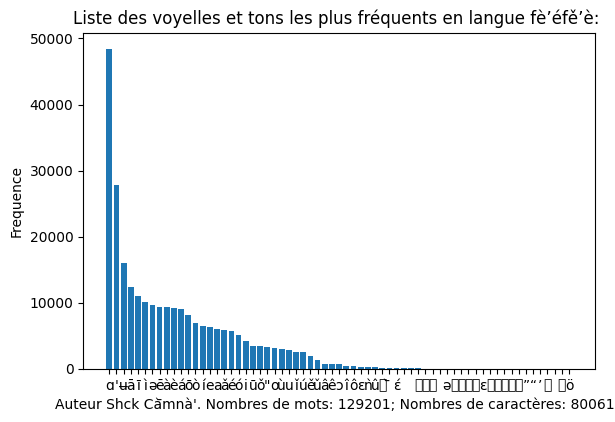

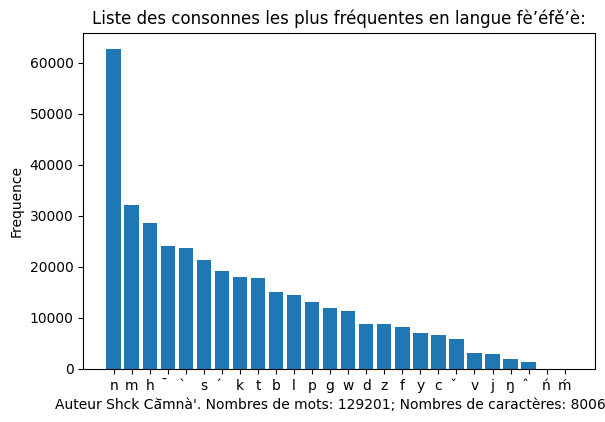

{'mɑ́': 1963,
 'lɑ́': 1799,
 'mɑ̀': 1412,
 'nɑ́': 1195,
 'ā': 1160,
 'bɑ̄': 1097,
 'à': 1089,
 'sì': 838,
 'tɑ̀': 754,
 'ō': 728,
 'nā': 685,
 'ò': 676,
 'ī': 638,
 'á': 636,
 'pí': 630,
 'pō': 573,
 'mbú': 572,
 'ǎ': 523,
 'yāā': 520,
 'wèn': 518,
 'sī': 515,
 'kɑ́': 513,
 'ó': 506,
 "tɑ̀'": 500,
 'yì': 493,
 'í': 493,
 'ì': 492,
 'mbɑ̄': 476,
 'làh': 460,
 "kɑ̀'": 456,
 'bɑ́': 437,
 'ndáh': 433,
 'mbí': 430,
 'yáá': 416,
 'ǒ': 415,
 'ɑ́': 408,
 'wū': 387,
 'lɑ̀': 376,
 'ngʉ́': 371,
 "sǐ'": 369,
 'pó': 367,
 'ngɑ̌': 361,
 'ngén': 360,
 'mbɑ̀': 335,
 'nù': 332,
 'mɑ̂': 323,
 'ghʉ̌': 308,
 'tɑ́': 296,
 'lè': 284,
 "pɑ́'": 276,
 'nzɑ̄': 276,
 'tɑ̄': 268,
 'nkwèè': 262,
 'mɑ̄': 261,
 'ndēn': 248,
 'sīē': 247,
 'mēn': 239,
 'ē': 239,
 "yá'": 234,
 'pèn': 230,
 "fà'á": 225,
 'béé': 221,
 'mbʉ́ɑ́': 219,
 'báá': 216,
 'a': 208,
 'lɑ̄': 207,
 'hɑ̄': 191,
 'lǎh': 187,
 'de': 184,
 "ŋwɑ̀'nì": 182,
 'pʉ̀': 179,
 'zhī': 177,
 'zǎ': 172,
 "mbɑ̄'": 172,
 'nshì': 169,
 'kò': 168,
 'ǹ': 167,
 'mǎ': 1

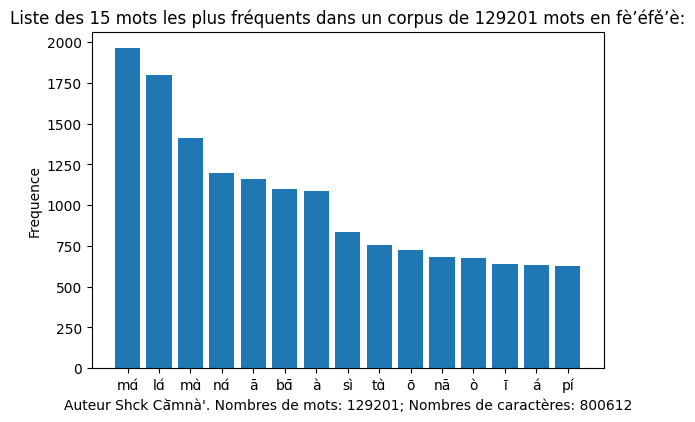

In [ ]:
###################################################################
# This Cell can take up to 2 min to run
###################################################################
# sent_start_with (Nufi_original,"Gh")
consonant = "bcdfghjklmnpqrstvwxyzŋńḿǹm̀m̄n̄m̌ňm̂n̂ńḿ"

# path = "/content/encyclopedie culture bamileke.txt"

path_file = "/content/Nufi_Emo_affaire_lit.txt"
path_file = "/content/text_nufi.txt"
path_file = "/content/text_nufi2.txt"
path_file = "/content/main_file3.txt"

path = path_file
def mostly_used_special_chr(data_path = path):
    
  import string
  import matplotlib.pyplot as plt
  from collections import Counter


  letters = string.ascii_letters

  
  with open(path_file) as f:
      data = f.readlines()
            
      data = list(map(lambda x: x.replace("\n",""), data))
      # list_nufi =  list(data["Nufi:Francais"])

      # string_nufi = "".join(list_nufi)

      words = " ".join(data).split(" ")

  # words_dict = dict.fromkeys(words, "Nufi")

  # forbiden_characters = r":<>[]()&*»_.,;/–1234567890«?=!…’+"
  forbiden_characters = r":[]()&*»_.,;/–1234567890«?=!…’+"


  # map( lambda x: x.strip(i) if i in [".,;"])

  clean_word = clean_word_function(words)

  # clean_word = [i for i in clean_word if i.lower() not in French_Words_dict.keys()]

  forbiden_fr = ["est","l'","d'","m'","n'","là","t"," ","s'","j'","qu'","qqn","l'on","lorsqu'on","s'il","qqch","d'après",
                 "présentatif","http","reference", "jeun","lorsqu'","dance","france",
                "il","lui","afrique","vrai","cameroun","prép","poss","adj","pron","bana","bafang","monthe","tchamna","ca᷅mnà'",
                "fè'éfě'è","nùfī", "ncɔ̀","nufi","nkhʉ̌","nkhʉ̀","pʉ́ɑ́","kwɑ̀","tāā","mōō","nshʉ̀'","pōō","kwɑ̌","fè'éfě'è"]
  clean_word = [i for i in clean_word if all(elem not in i for elem in forbiden_fr)]
  clean_word = [i.lower() for i in clean_word if i !=""]

  clean_word = list(map(lambda x: x.replace("yέέ","yáá"),clean_word))
  clean_word = list(map(lambda x: x.replace("nàh","làh"),clean_word))
  clean_word = list(map(lambda x: x.replace("nɛ̄","nā"),clean_word))

  
  
  # clean_word = [i for i in clean_word if i.lower() not in forbiden_fr]

  

  # words = [i for i in words if all(elem not in i for elem in forbiden_characters)]
  
  text = "".join(data)

  len_data = len(data)
  len_text = len(text)
  len_words = len(clean_word)
  
  set_words = list(set(clean_word))  
  dict_count_words = {i:words.count(i) for i in set_words}


  sorted_words_dict = sorted(dict_count_words.items(),key=lambda x: x[1],reverse=True )
  dict_count_words = dict(sorted_words_dict)
  
  # print(f"nombre de phrases:{len_data}\nnombres de mots: {len_words}\nnombre de caractères:{len_text}")

  text = text.lower()
  
  # text = words
  set_text = list(set(text))
  
  
  # dict_count = {i:text.count(i) for i in set_text if  i in letters and  i != " "}
  # dict_count = {i:text.count(i) for i in set_text if  i not in letters+"':<>[]()&*»-_.,\n;/–1234567890«?ç=!ï…’+œé" and  i != " "}
  dict_count_vowel = {i:text.count(i) for i in set_text if  i not in ":<>[]()&*»-_.,\n;/–1234567890«?ç=!ï…’+œqxr" and  i != " " and i not in consonant}
  dict_count_consonant = {i:text.count(i) for i in set_text if  i not in ":<>[]()&*»-_.,\n;/–1234567890«?ç=!ï…’+œqxr" and  i != " " and i in consonant}

  sorted_items_vowel = sorted(dict_count_vowel.items(),key=lambda x: x[1],reverse=True )
  dict_count_vowel = dict(sorted_items_vowel)

  sorted_items_cons = sorted(dict_count_consonant.items(),key=lambda x: x[1],reverse=True)
  dict_count_consonant_ = dict(sorted_items_cons)

  dict_count_ = {k:v for k,v in dict_count_vowel.items() if v>0}
  
  fig = plt.figure()
  ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))

  ax1.set_title("Liste des voyelles et tons les plus fréquents en langue fè’éfě’è: ")
  ax1.set_xlabel(f"Auteur Shck Ca᷅mnà'. Nombres de mots: {len_words}; Nombres de caractères: {len_text}")
  ax1.set_ylabel('Frequence')

  plt.bar(dict_count_.keys(),dict_count_.values())
  # plt.title("Liste des caractères et tons les plus fréquent en langue fè’éfě’è: ")
  plt.show()
  #####################################################################################

  fig = plt.figure()
  ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))

  ax1.set_title("Liste des consonnes les plus fréquentes en langue fè’éfě’è:")
  ax1.set_xlabel(f"Auteur Shck Ca᷅mnà'. Nombres de mots: {len_words}; Nombres de caractères: {len_text}")
  ax1.set_ylabel('Frequence')

  plt.bar(dict_count_consonant_.keys(),dict_count_consonant_.values())
  
  plt.show()
  #####################################################################################
  fig = plt.figure()
  ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
  top = 15
  dict_count_words_top = dict(Counter(dict_count_words).most_common(top))

  ax1.set_title(f"Liste des {top} mots les plus fréquents dans un corpus de {len_words} mots en fè’éfě’è:")
  ax1.set_xlabel(f"Auteur Shck Ca᷅mnà'. Nombres de mots: {len_words}; Nombres de caractères: {len_text}")
  ax1.set_ylabel('Frequence')

  plt.bar(dict_count_words_top.keys(),dict_count_words_top.values())

  #####################################################################################



  # print(dict_count)  

    
  
  

  return dict_count_,dict_count_words

dict_counting = mostly_used_special_chr()
dict_counting[-1]
# "de","la","le","les", "à", "du", "qui", "et", "est"


In [ ]:
dd = {"Nufi":dict_counting[-1].keys(),"Freq":dict_counting[-1].values()}
df_most_frequent = pd.DataFrame(dd)
df_most_frequent.to_csv("MostFrequentWords_Nufi.csv",encoding='utf-8-sig')


In [ ]:
df_most_frequent["Freq"] = df_most_frequent["Freq"].apply(lambda x: 1e-5 if x==0 else x)

In [ ]:

# Nufi_original.to_csv("Nufi_original.csv",encoding='utf-8-sig')
df_most_frequent["length"] = list(map(lambda x: len(x),df_most_frequent["Nufi"]))
df_most_frequent["perc"] = df_most_frequent["Nufi"].apply(lambda x: len(x)/max(df_most_frequent["length"]))
df_most_frequent["metric"] = df_most_frequent["length"]/df_most_frequent["Freq"]
df_most_frequent

,Nufi,Freq,length,perc,metric
0,me,24.00000,2,0.181818,0.083333
1,pèn,15.00000,3,0.272727,0.200000
2,ncáh,11.00000,4,0.363636,0.363636
3,lā,11.00000,2,0.181818,0.181818
4,nnák,8.00000,4,0.363636,0.500000
...,...,...,...,...,...
58,wǎ',0.00001,3,0.272727,300000.000000
59,yǒh,0.00001,3,0.272727,300000.000000
60,bana,0.00001,4,0.363636,400000.000000
61,i,0.00001,1,0.090909,100000.000000


In [ ]:
df_rand_row = df_most_frequent.sample(axis=0,frac=.01)
df_rand_subset = df_rand_row.sample(axis=1,n = 2)
df_rand_subset

,length,Nufi
6,3,láh


In [ ]:
# mask = df_most_frequent["Nufi"] == "mɑ̀" 

# mask.sum()

cols = df_most_frequent.columns
df_most_frequent = df_most_frequent.rename(columns={i : i + " " + i for i in cols})
cols = df_most_frequent.columns

df_most_frequent.columns = list(map(lambda x: x.replace(" ","_"), cols))
df_most_frequent

,Nufi_Nufi,Freq_Freq,length_length,perc_perc,metric_metric
0,me,24.00000,2,0.181818,0.083333
1,pèn,15.00000,3,0.272727,0.200000
2,ncáh,11.00000,4,0.363636,0.363636
3,lā,11.00000,2,0.181818,0.181818
4,nnák,8.00000,4,0.363636,0.500000
...,...,...,...,...,...
58,wǎ',0.00001,3,0.272727,300000.000000
59,yǒh,0.00001,3,0.272727,300000.000000
60,bana,0.00001,4,0.363636,400000.000000
61,i,0.00001,1,0.090909,100000.000000


# Define a New Column Based on a combination of conditions on several columns



In [ ]:
# df_most_frequent.query("Nufi_Nufi == 'mɑ̀' or length_length>15 ")
# df_most_frequent.query('Nufi_Nufi in ["mɑ̀","mfɑ̀\'"]')
cols = ["Nufi_Nufi", "Freq_Freq","length_length"]
# df_most_frequent["good"] = df_most_frequent.applymap[lambda x: cols]

def good(row):
  Nufi = row[0]
  Freq = row[1]
  Length = row[2]

  # print(Freq)

  if len(Nufi)>15:
    return "Yaa2 yeu33 taf1'"
  elif float(Freq) <.5:
    return "Fa'a2 baf2!"
  else:
    return "Hahaha"

def OK(row):
  Nufi = row[0]
  

  # print(Freq)

  if len(Nufi)>15:
    return "Yaa2 pe1'"
  else: return "Yaa2 paf3h"
  
  # else:
  #   return "Hahaha"

df_most_frequent["Good"] = df_most_frequent.apply(good,axis=1)
df_most_frequent["OK"] = df_most_frequent.apply(OK,axis=1)

df_most_frequent


NameError: ignored

In [ ]:
l = df_most_frequent["Nufi_Nufi"].str[0]+df_most_frequent["Nufi_Nufi"].str[1]

list(l)

In [ ]:
df_most_frequent["Nufi_Nufi"] = list(map(lambda x: x.lower(),df_most_frequent["Nufi_Nufi"]))
df_most_frequent

,Nufi_Nufi,Freq_Freq,length_length,perc_perc,metric_metric,Good,OK
0,mɑ̀,3309.00000,3,0.090909,9.066183e-04,Hahaha,Yaa2 paf3h
1,nɑ́,2115.00000,3,0.090909,1.418440e-03,Hahaha,Yaa2 paf3h
2,ncɑ̄',1219.00000,5,0.151515,4.101723e-03,Hahaha,Yaa2 paf3h
3,nkhʉ̌,1218.00000,5,0.151515,4.105090e-03,Hahaha,Yaa2 paf3h
4,ǎ,1128.00000,1,0.030303,8.865248e-04,Hahaha,Yaa2 paf3h
...,...,...,...,...,...,...,...
10563,ngə̀ə̀mɑ̀,0.00001,9,0.272727,9.000000e+05,Fa'a2 baf2!,Yaa2 paf3h
10564,ncámkò,0.00001,6,0.181818,6.000000e+05,Fa'a2 baf2!,Yaa2 paf3h
10565,infirmierinfirmière,0.00001,19,0.575758,1.900000e+06,Yaa2 yeu33 taf1',Yaa2 pe1'
10566,yámngwê,0.00001,7,0.212121,7.000000e+05,Fa'a2 baf2!,Yaa2 paf3h


In [ ]:
mask = df_most_frequent["Nufi_Nufi"].apply(lambda x: "ɑ̄'" in x)
df_most_frequent[mask]

mask = df_most_frequent["Nufi_Nufi"].str.contains("lɑ́'")
df_most_frequent[mask]


,Nufi_Nufi,Freq_Freq,length_length,perc_perc,metric_metric,Good,OK
284,lɑ́',38.00000,4,0.121212,1.052632e-01,Hahaha,Yaa2 paf3h
712,póálɑ́',15.00000,7,0.212121,4.666667e-01,Hahaha,Yaa2 paf3h
1313,lɑ́'kām,7.00000,7,0.212121,1.000000e+00,Hahaha,Yaa2 paf3h
1957,pɑ̌lɑ́',5.00000,7,0.212121,1.400000e+00,Hahaha,Yaa2 paf3h
2434,ghə̀ə̄lɑ́',3.00000,10,0.303030,3.333333e+00,Hahaha,Yaa2 paf3h
2976,pɑ̀ndʉ́ɑ́'lɑ́',2.00000,14,0.424242,7.000000e+00,Hahaha,Yaa2 paf3h
4713,mɑ̄lɑ́',1.00000,7,0.212121,7.000000e+00,Hahaha,Yaa2 paf3h
4734,pɑ̀mbīɑ̄ɑ̀lɑ́',1.00000,14,0.424242,1.400000e+01,Hahaha,Yaa2 paf3h
5170,lɑ́'pūh,1.00000,7,0.212121,7.000000e+00,Hahaha,Yaa2 paf3h
5482,nǔzɑ́lɑ́',1.00000,9,0.272727,9.000000e+00,Hahaha,Yaa2 paf3h


In [ ]:
data = ["gsgd","h4bf","byr","ā45"]
forbid = "0123456789"

# [i for i in data if forbid[j] not in i]
[i for i in data if all(elt not in i for elt in forbid)]

glot = df_most_frequent[df_most_frequent["Nufi_Nufi"].str.contains("'")]

glot

glot["Nufi_Nufi"].value_counts()



ncɑ̄'            1
wúkwè'wúkə̀'     1
nsə́'            1
cwē'sɑ̄'ngwè'    1
mbɑ̂'nsɑ̄'       1
                ..
mvǎklīē'         1
nnú'nshì         1
ngwɑ̀'           1
kàmkǎmnkà'       1
yá'nə̄h          1
Name: Nufi_Nufi, Length: 3311, dtype: int64

In [ ]:
4

# Resulam Book Sale Processing

In [ ]:
Language_Dict["Ghomala'"][0]


"Ghomala'"

In [ ]:
import pandas as pd 


file_name = "/content/Rapport des Livres Vendu Resulam 2022.xlsx"
Language_List = ["Swahili","Wolof","Ghomala'","Kikongo","Dioula","Fongbe","Basaa","Duala","Ewondo","Nufi","Yemba","Medumba","Ngemba"]
Language_Dict = {"Swahili":["Swahili"],"Wolof":["Wolof"],
                 "Ghomala'":["Ghomala'","Ghɔmálá'","Ghomala"],
                 "Ghomala":["Ghomala'","Ghɔmálá'","Ghomala"],
                 "Kikongo":["Kikongo","Kongo"],
                 "Dioula":["Dioula"],
                 "Fongbe":["Fongbe","Fon"],"Basaa":["Basaa"],
                 "Duala":["Duala","Douala"],
                 "Douala":["Duala","Douala"],
                 "Ewondo":["Ewondo"],
                 "Nufi":["Nufi","fe'efe'e"],
                 "fe'efe'e":["Nufi","fe'efe'e"],
                 "Yemba":["Yemba"],
                 "Medumba":["Medumba"],
                 "Ngemba":["Nguemba","Ŋgə̂mbà","Ngemba"],
                 "Ŋgə̂mbà":["Nguemba","Ŋgə̂mbà","Ngemba"],
                 "Nguemba":["Nguemba","Ŋgə̂mbà","Ngemba"]}

def shift_col_to_position(dataframe,col_label_to_move,position=0):

  # shift column col_label_to_move to position "position"
  column_to_move = dataframe.pop(col_label_to_move)

  # insert column using insert(position,column_name,
  
  # insert_position = 0
  dataframe.insert(position, col_label_to_move, column_to_move)


df_all_sale = pd.read_excel(file_name,sheet_name="Combined Sales")
df_ebook = pd.read_excel(file_name,sheet_name="eBook Royalty")
df_paper = pd.read_excel(file_name,sheet_name="Paperback Royalty")
df_hard = pd.read_excel(file_name,sheet_name="Hardcover Royalty")

# ##############################################################

title = list(df_all_sale["Title"])
title_short = list(df_all_sale["Title(Short)"])

dict_title = dict(zip(title,title_short))

col_all = df_all_sale.columns
col_ebook = df_ebook.columns
col_paper = df_paper.columns
col_hard = df_hard.columns

# ##############################################################

col_interest = [i for i in col_all if i in col_ebook]

df_ebook_interest = df_ebook[col_interest]
df_ebook_interest["BookType"] = "Ebook"

df_paper_interest = df_paper[col_interest]
df_paper_interest["BookType"] = "Paper"

df_hard_interest = df_hard[col_interest]
df_hard_interest["BookType"] = "Hard"


df_interest = pd.concat([df_paper_interest,df_hard_interest,df_ebook_interest])

df_interest["Short_Title"] = df_interest["Title"].apply( lambda x: dict_title[x] )


# Shift Last Column to position 2
shift_col_to_position(df_interest, df_interest.columns[-1],2)


unique_curr = list(df_interest["Currency"].unique())

for i in unique_curr:
  globals()[f"df_interest_{i}"] = df_interest[df_interest["Currency"] == i]

appended_data = []

for i in unique_curr:
  if i == "CAD":
     globals()[f"df_interest_{i}"]["Royalty_Convert(USD)"] = globals()[f"df_interest_{i}"]["Royalty"].apply(lambda x: round(x*0.74,2))     
     appended_data.append(globals()[f"df_interest_{i}"])
  elif i == "EUR":
    globals()[f"df_interest_{i}"]["Royalty_Convert(USD)"] = globals()[f"df_interest_{i}"]["Royalty"].apply(lambda x: round(x*1))
    appended_data.append(globals()[f"df_interest_{i}"])
  elif i == "GBP":
    globals()[f"df_interest_{i}"]["Royalty_Convert(USD)"] = globals()[f"df_interest_{i}"]["Royalty"].apply(lambda x: round(x*1.21))
    appended_data.append(globals()[f"df_interest_{i}"])
  elif i == "JPY":
    globals()[f"df_interest_{i}"]["Royalty_Convert(USD)"] = globals()[f"df_interest_{i}"]["Royalty"].apply(lambda x: round(x*0.0076))
    appended_data.append(globals()[f"df_interest_{i}"])
  
  elif i == "USD":
    globals()[f"df_interest_{i}"]["Royalty_Convert(USD)"] = globals()[f"df_interest_{i}"]["Royalty"].apply(lambda x: round(x*1,2))
    appended_data.append(globals()[f"df_interest_{i}"])

appended_data = pd.concat(appended_data)

appended_data["Royalty(CFA)"] = appended_data["Royalty_Convert(USD)"].apply(lambda x: round(x*550,0))

# shift_col_to_position(appended_data, appended_data.columns[-1],appended_data.shape[1]-2)


books_list = appended_data["Short_Title"].unique()
# books_list
# Add A Language Column
appended_data["Language"] = appended_data["Short_Title"]
for i in Language_Dict:
  appended_data["Language"] = appended_data["Language"].apply(lambda x: Language_Dict[i][0] if i in x else x)

# appended_data["Language"] = appended_data["Language"].apply(lambda x: "Ngemba" if i in ["Ŋgə̂mbà","Ngemba","Nguemba"] else x)

appended_data.to_csv("Rapport_Livres_Vendus_Resulam_2022.csv",encoding="utf 8-sig")




<ipython-input-76-4dc705e6c964>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ebook_interest["BookType"] = "Ebook"
<ipython-input-76-4dc705e6c964>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paper_interest["BookType"] = "Paper"
<ipython-input-76-4dc705e6c964>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [ ]:
# tt = ["Swahili_Phrasebook","aNufi"]
# for i in Language_Dict:
#   if i in "Swahili_Phrasebook":
#     print(i)
# appended_data['Short_Title'].str.contains("Swahili")
# appended_data["Short_Title"].apply(lambda x: "Swahili" if "Swahili" in x else x)

In [ ]:
# Language_List = ["Swahili","Wolof","Ghomala'","Kikongo","Dioula","Fongbe","Basaa","Duala","Ewondo","Nufi","Yemba","Medumba","Ŋgə̂mbà/Ngemba"]



In [ ]:
lits_tuple = [("Ndonke", "IMELE", "Tafouemewe", "Tchamna",	2.568),
("BITJAA", "Tchamna",	80.04333333),
("Djobia", "Tchamna",	24.05666667),
("Djobia", "Tchoumi", "Tchamna",	49.185),
("Ekwalla", "Tchamna",	33.89),
("Fu Tientcheu", "Tchamna",	193.8933333),
("Hounsossou", "Tchamna",	9),
("Jiokeng Feutsa","Tafouemewe", "Tchamna", 	36.52),
("Khayar KANE", "Tchamna",	45.43333333),
("Kimbuala Hemsey", "Tchamna",	7.96),
("Motoum", "Tchamna",	41.29),
("Mvondo", "Tchamna",	110.3133333),
("Ndonke", "Tchamna",	9.06),
("Oyange Wajuanga", "Tchamna",	28.74),
("Segallo", "Tchamna",	12.7),
("SIDIBE", "Tchamna",	4),
("Tchoumi", "Tchamna",	16.38666667)]


(('x1', 'x1', 'x4'), ('x2', 'x4', 'z1'), ('x3', 80, 24), ('x4',), (2,))


In [ ]:
from collections import defaultdict

# values = [
#     ("x1", "x2", "x3", "x4", 2),
#     ("x1", "x4", 80),
#     ("x4", "z1", 24)
# ]

results = defaultdict(int)

for *keys, nb in lits_tuple:
    for key in keys:
        # print(key) 
        results[key] += round(nb,2)

print(results)
# {'x1': 82, 'x2': 2, 'x3': 2, 'x4': 106, 'z1': 24}

import pandas as pd
kk = results.keys()
val = results.values()

authors_royaolies_2022 = pd.DataFrame({"names": kk,"USD": val})

authors_royaolies_2022 = authors_royaolies_2022.sort_values(by="USD")
authors_royaolies_2022.to_csv("authors_royaolies_2022.csv")

defaultdict(<class 'int'>, {'Ndonke': 11.63, 'IMELE': 2.57, 'Tafouemewe': 39.09, 'Tchamna': 705.0399999999998, 'BITJAA': 80.04, 'Djobia': 73.25, 'Tchoumi': 65.58, 'Ekwalla': 33.89, 'Fu Tientcheu': 193.89, 'Hounsossou': 9, 'Jiokeng Feutsa': 36.52, 'Khayar KANE': 45.43, 'Kimbuala Hemsey': 7.96, 'Motoum': 41.29, 'Mvondo': 110.31, 'Oyange Wajuanga': 28.74, 'Segallo': 12.7, 'SIDIBE': 4})


In [ ]:
my_dict.get(2)

In [ ]:
# Problem to ask on Stack OverFlow
lits_tuple = [
("x1", "x2", "x3", "x4",	2),
("x1", "x4",	80),
("x4", "z1",	24)]

# Expected Result:

{"x1": 82} # Because we had x1 in the first tuple with value 2, and x1 in tuple2 with value 80; 2+80 = 82
{"x2": 2} # Because we had x2 only in the first tuple with value 2
{"x3": 2} # Because we had x3 only in the first tuple with value 2
{"x4": 106} # Because we had x4 in the first tuple with value 2, and x4 in tuple2 with value 80 and x4 in tuple3 with value 24; 2+80+24 = 106 
{"z1": 24} # Because we had z1 only in the last tuple with value 24


tuple1 = lits_tuple[0]
last_element_tuple1 = tuple1[-1]
range_other_element_tuple1 = [i for i in range(len(lits_tuple[0])-1) ]
len_other_element_tuple1 = len(lits_tuple[0])-1

list(zip(tuple1[0],str(tuple1[-1])))
dict(tuple((tuple1[0],tuple1[-1])))
zip(*tuple1)
lits_tuple
# k goes from 1 to len(lits_tuple) + 1
# last_element_tuplek = lits_tuple[k-1][-1]
# range_other_element_tuplek = [i for i in range(len(lits_tuple[k-1])-1) ]
# len_other_element_tuplek = len(lits_tuple[k-1])-1



for k in range(1,len(lits_tuple) + 1):
  last_element_tuplek = lits_tuple[k-1][-1]
  range_other_element_tuplek = [i for i in range(len(lits_tuple[k-1])-1) ]
  len_other_element_tuplek = len(lits_tuple[k-1])-1

  other_elements = [i[0:len_other_element_tuplek] for i in lits_tuple]

  print(range_other_element_tuplek,other_elements)

TypeError: ignored

defaultdict(<class 'int'>, {'Ndonke': 11.628, 'IMELE': 2.568, 'Tafouemewe': 39.088, 'Tchamna': 668.5196665999999, 'BITJAA': 80.04333333, 'Djobia': 73.24166667, 'Tchoumi': 65.57166667, 'Ekwalla': 33.89, 'Fu Tientcheu': 193.8933333, 'Hounsossou': 9, 'Jiokeng Feutsa': 36.52, 'Shck Tchamna': 36.52, 'Khayar KANE': 45.43333333, 'Kimbuala Hemsey': 7.96, 'Motoum': 41.29, 'Mvondo': 110.3133333, 'Oyange Wajuanga': 28.74, 'Segallo': 12.7, 'SIDIBE': 4})


In [ ]:
# Problem to ask on Stack OverFlow
lits_tuple = [
("x1", "x2", "x3", "x4",	2),
("y1", "x4",	80),
("z1", "x4",	24),
("z1", "z2", "x4",	49),
("t1", "x4",	33),
("v1", "x4",	193),
("w1", "x4",	9),
("p1","x3", "x4", 36),
("r1", "x4",	45),
("s1", "x4",	7),
("k1", "x4",	41),
("m1", "x4",	110),
("x1", "x4",	9),
("n1", "x4",	28),
("o1", "x4",	12),
("u1", "x4",	4),
("z2", "x4",	16)]


# Guide de Conversation Book Processing

## BEGINNING

In [ ]:

import re 

def phrase_cleaning(Phrase,sep1 = "|", sep2 = "/"):
    
  # clean_sentence = ""
  # sent = ""
  # "/" not in "gagae"
  # ending_punctuation = ".?!"
  # sep1 = "|"
  # sep2 = "/"
  # k = 2
  s = Phrase

  sentence1 = s.split(sep1)[0]
  sentence2 = s.split(sep1)[1]
  sentence3 = s.split(sep1)[2]
  
  # Remove extra spaces
  sentence3 = ' '.join(sentence3.split())

  sentence3 = sentence3.replace(". /","./")
  sentence3 = sentence3.replace("! /","!/")
  sentence3 = sentence3.replace("? /","?/")

  delim = {".":"\./", "!" : "!/", "?":"\?/"}

  # print(s)
  for i in delim:
      
    split_text = re.split(delim[i],sentence3)

    if len(split_text) > 1 and "" not in split_text:
      english = split_text[0] + i
      ghomala = split_text[-1].strip()
      ghomala = ghomala[0].upper()+ghomala[1:]+" "

      # ghomala = "<b>" + ghomala + "</b>"

      break

  # print("split_text",split_text)
  if len(split_text) <= 1 or "" in split_text:
    clean_sentence = Phrase
  else:
    new_sentence = (sep1 + " ").join([ghomala,sentence2,english])

    clean_sentence = new_sentence.replace(sentence1,ghomala)

    clean_sentence = " ".join(clean_sentence.split())
  
  return clean_sentence

# phrase_cleaning(Phrase)




#Get the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install docx2txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

# import docx2txt 
# # extract the text from the docx file
# text_str = docx2txt.process(docx_file)
# # convert the text to a list separated by line
# text_list = text_str.splitlines()
# my_file = [i for i in text_list if i.count("|") == 2]


In [ ]:
import os, pandas as pd 

global_path = "/content/drive/MyDrive/Resulam/Mbú'ŋwɑ̀'nì/Livres "


# CAMEROON
path_ghomala = global_path + "Ghomala/Ghomala_CMR_Phrasebook_ExpressionsUsuelles_GuideConversation.docx"
path_medumba = global_path + "Medumba/Medumba_CMR_Phrasebook_ExpressionsUsuelles_GuideConversation.docx"
path_nufi = global_path + "Nufi/Nufi_CMR_Phrasebook_ExpressionsUsuelles_GuideConversation.docx"


path_shupamom = global_path + "Bamoun/Bamoun_CMR_Phrasebook_ExpressionsUsuelles_GuideConversation.docx"

path_basaa = global_path + "Basaa/Basaa_CMR_Phrasebook_ExpressionsUsuelles_GuideConversation.docx"
path_duala = global_path + "Duala/DualaDouala_CMR_Phrasebook_ExpressionsUsuelles_GuideConversation.docx"
path_ewondo = global_path + "Ewondo/Ewondo_CMR_Phrasebook_ExpressionsUsuelles_GuideConversation.docx"



# OTHER - AFICA 
path_ewe = global_path + "EweTogo/EweTogo_Phrasebook_ExpressionsUsuelles_GuideConversation.docx"
path_fulfulde_benin = global_path + "Fulfulde/FulfuldeBenin_Benin_Phrasebook_ExpressionsUsuelles_GuideConversation.docx"
path_fulfulde_nigeria = global_path + "Fulfulde_Nigeria/FulfuldeNigeria_Nigeria_Phrasebook_ExpressionsUsuelles_GuideConversation.docx"
path_hausa = global_path + "Hausa/Hausa_Benin_Phrasebook_ExpressionsUsuelles_GuideConversation.docx"
path_igbo = global_path + "Igbo/Igbo_Nigeria_Phrasebook_ExpressionsUsuelles_GuideConversation.docx"
path_kikongo = global_path + "Kikongo/Kikongo_RDCongo_Phrasebook_ExpressionsUsuelles_GuideConversation.docx"
path_lingala = global_path + "Lingala/Lingala_RDCongo_Phrasebook_ExpressionsUsuelles_GuideConversation.docx"


path_swahili = global_path + "Swahili/Swahili_TanzaniaKenya_Phrasebook_ExpressionsUsuelles_GuideConversation.docx"

path_tshiluba = global_path + "Tshiluba/Tshiluba_RDCongo_Phrasebook_ExpressionsUsuelles_GuideConversation.docx"

path_wolof = global_path + "Wolof/Wolof_Senegal_Phrasebook_ExpressionsUsuelles_GuideConversation.docx"
path_yoruba = global_path + "Yoruba/Yoruba_Nigeria_Phrasebook_ExpressionsUsuelles_GuideConversation.docx"







In [ ]:

# "Mbú'ŋwɑ̀'nì\Livres Nufi\expressions usuelles guide de conversation en langue fe'efe'e nufi pour video.txt"
# expressions usuelles guide de conversation en langue medumba.txt
def read_data(path):
  with open(path,encoding = 'utf-8') as f:
    my_file = f.readlines()
  my_file = [i for i in my_file if i.count("|") == 2]
  return my_file

# def read_data_from_doc(path):
#   import docx

#   # Open the Word document
#   doc = docx.Document(path)

#   # Get all paragraphs in the document
#   all_paragraphs = doc.paragraphs

#   my_file = []
#   # Loop through each paragraph and print its text
#   for paragraph in all_paragraphs:
#       # print(paragraph.text)
#       my_file.append(paragraph.text)

#   my_file = [i for i in my_file if i.count("|") == 2]
#   return my_file

def from_word_to_list(path):  
  import docx2txt
  # extract the text from the docx file
  text_str = docx2txt.process(path)

  
  text_str = text_str.replace("\xa0","")
  text_str = text_str.replace("\t","")

  # convert the text to a list separated by line
  text_list = text_str.splitlines()
  my_file = [i for i in text_list if i.count("|") == 2]
  return my_file


In [ ]:
# Ewe_list

In [ ]:

# ff = "/content/drive/MyDrive/Resulam/Mbú'ŋwɑ̀'nì/Livres Fulfulde/FulfuldeBenin_Benin_Phrasebook_ExpressionsUsuelles_GuideConversation.docx"

# doc = docx.Document(ff)


In [ ]:

languages_path_list_CMR = [path_nufi, path_ghomala, path_medumba, path_shupamom, 
                      path_basaa, path_duala, path_ewondo]

languages_path_list_other =  [path_ewe, path_fulfulde_benin, path_fulfulde_nigeria, path_hausa, 
                              path_igbo, path_kikongo, path_lingala, path_swahili, path_tshiluba, path_wolof, path_yoruba]



languages_path_list_all = languages_path_list_CMR + languages_path_list_other 

languages_name_all = []

for lang_path in languages_path_list_all:
  lang = os.path.basename(lang_path).split("_")[0]
  languages_name_all.append(lang)
  print(lang)
  globals()[f"{lang}_"] = from_word_to_list(lang_path)
  # print(lang)


Nufi
Ghomala
Medumba
Bamoun
Basaa
DualaDouala
Ewondo
EweTogo
FulfuldeBenin
FulfuldeNigeria
Hausa
Igbo
Kikongo
Lingala
Swahili
Tshiluba
Wolof
Yoruba


In [ ]:
# Ghomala
# Yoruba

def starting_index(lang):
  idx = 0
  for txt in lang:
    # print(txt)
    # time.sleep(1)
    idx += 1
    if "| Salut." in txt:
    # if "| Chapitre" in txt:
      # print(idx)
      return idx-2
    
# starting_index(globals()["Nufi"])
for lang in languages_name_all:
    
  start_idx =  starting_index(globals()[lang+"_"])
  # print(lang, start_idx)
  globals()[lang] = globals()[lang+"_"][start_idx-1:]

In [ ]:
[ i for i in Ghomala if "Chap" in i]
Ghomala[0:50]

["Nzâknù 1. Lɑ̀'sǐnā. | Chapitre 1. Faire les présentations. | Chapter1. Introductions.",
 "Làh ndɑ́’sí nā wěn mɑ́ ntûmbhì wū yì mbɑ̀wɑ̄lɑ́ nnēē nkwá’sí làh ngʉ́sīècɑ́’ è lɑ́. Ǒ ìndī’ měh béé sìèsì lè mɑ̀ ǒ còh nzhī làh ndɑ́’sí nā ō, mbát nté’sí nǔ mbhí wèn yì yēē pɑ́h í mɑ̀nsāhnù lɑ́, ɑ́ lǎh cǒh zhī ì. | Se présenter, c’est-à-dire parler de soi est la chosela plus instinctive du monde. À la fin de ce chapitre, vous serez en mesure non seulement de vous présenter correctement en langue fè'éfě'è', mais aussi de poser les questions à votre interlocuteur pour mieux le connaitre. | Introducing or talking about yourself, is the most instinctive thing in the world. At the end of this chapter, you will not only be able to present yourself correctly in the Fè'éfě'è 'language, but also to ask questions to your interlocutor to get to know him better.",
 'Ə́daʼ lə́ ə́/Gaə̌ càʼtə̀. | Salut. | Hello.',
 'Gaə̌ caʼtə m fə̂ à. | Salut mon frère/ma sœur. | Hello my brother/sister.',
 'Â m gaə̂ kə̀? |

## Transform to dataframe

In [ ]:

def list_to_frame_and_save(data_list, language_name = "ghomala'", from_line = 122, save = 0):
  import pandas as pd 
  # language_name = "".join([i for i in language_name if i.isalnum()])
  df = pd.DataFrame(data_list).iloc[from_line:]
  ghomala_df = df.reset_index(drop=True)
  df = df.drop_duplicates()
  if save != 0:
    df.to_csv(f"{language_name}_clean.csv",encoding="utf 8-sig")
  return df

for lang in languages_name_all:
  globals()[f"{lang}_df"] = list_to_frame_and_save(globals()[lang], language_name = lang, from_line = 0)

# Ghomala_df

# Expand | Split data into columns

In [ ]:
def expand_tranformation(df,language_name="Ghomala"):

  # language_name = "".join([i for i in language_name if i.isalnum()])
  

  df[[f"{language_name}","Francais","Anglais"]] = df[0].str.split("|",expand=True)
  df = df[df.drop(0,axis=1)["Francais"].apply(lambda x: x is not None)]
  # df = df[df.drop(0,axis=1)["Anglais"].apply(lambda x: x is not None)]
  df = df.applymap(lambda x : x.strip())
  return df

for lang in languages_name_all:
  globals()[f"{lang}_df"] = expand_tranformation(globals()[f"{lang}_df"],language_name=lang)

# ghomala_df = expand_tranformation(ghomala_df)
# nufi_df = expand_tranformation(nufi_df,language_name="Nufi")
# medumba_df = expand_tranformation(medumba_df,language_name="Medumba")
# # shupamom_df = expand_tranformation(shupamom_df.iloc[0:1690],language_name="Shupamom")
# shupamom_df = expand_tranformation(shupamom_df,language_name="Shupamom")
# fulfulde_benin_df = expand_tranformation(fulfulde_benin_df,language_name="Fulfulde_Benin")
# fulfulde_nigeria_df = expand_tranformation(fulfulde_nigeria_df,language_name="Fulfulde_Nigeria")

# # fulfulde_benin_df[0].str.split("|",expand=True)
# bb = fulfulde_nigeria_df[0].str.split("|",expand=True)
# aa = fulfulde_nigeria_df[0].str.split("|",expand=True)[3]
# mask = bb[3].apply(lambda x: x is not None)
# bb[mask]


# shupamom_df
# # medumba_df.head()

# # medumba_df[medumba_df["Francais"].isnull()]

# dd = medumba_df[medumba_df.drop(0,axis=1)["Francais"].apply(lambda x: x is not None)]
# dd[dd["Anglais"].isna()]
# ddd.isna()

## Multiple String Replacement

In [ ]:
# medumba_df.head()
punct_replace = {" .": "."," (": "("," ;": ";"," ?": "?"," !": "!","’":"'"}

sent_replace = {
    "Bonsoir.": "Bonsoir!",
    "Bonsoir maman.": "Bonsoir maman!",
    "Bonne cérémonie d'anniversaire de mariage.": "Bonne cérémonie d'anniversaire de mariage!",
    "Bonne cérémonie de mariage.": "Bonne cérémonie de mariage!",
    "C'est vrai, je t'assure.": "C'est vrai, je t'assure!",
    "Désolé(e), pardon.": "Désolé(e), pardon!",
    "Embrasse-moi s'il te plait.": "Embrasse-moi s'il te plait!",
    "Kiss me please." : "Kiss me please!",
    "Bonne nuit.": "Bonne nuit!",
    "Good evening.": "Good evening!",
    "Good night.":"Good night!",
    "Good evening mother.": "Good evening mother!",
    "Qu'il en soit ainsi.": "Qu'il en soit ainsi!",
    "Soyez les bienvenus.": "Soyez les bienvenus!",
}

punct_replace.update(sent_replace)


# C’est mon ami(e)
# s = "hsy ! plus ? shhs ."
# for r in punct_replace.items():
#   print(r)
#   print("ȩvy",*r)
#   s = s.replace(*r)
# print(s)
def multi_replacements(s):    
  for r in punct_replace.items():
      s = s.replace(*r)
  return s


for lang in languages_name_all:
  globals()[f"{lang}_df"] = globals()[f"{lang}_df"].applymap(multi_replacements)

for lang in languages_name_all:
  globals()[f"{lang}_df"] = globals()[f"{lang}_df"].applymap(lambda x: x.strip())

# nufi_df = nufi_df.applymap(multi_replacements)
# medumba_df = medumba_df.applymap(multi_replacements)
# ghomala_df = ghomala_df.applymap(multi_replacements)
# shupamom_df = shupamom_df.applymap(multi_replacements)
# fulfulde_benin_df = fulfulde_benin_df.applymap(multi_replacements)
# fulfulde_nigeria_df = fulfulde_nigeria_df.applymap(multi_replacements)

# nufi_df = nufi_df.applymap(lambda x: x.strip())
# medumba_df = medumba_df.applymap(lambda x: x.strip())
# ghomala_df = ghomala_df.applymap(lambda x: x.strip())
# fulfulde_benin_df = fulfulde_benin_df.applymap(lambda x: x.strip())
# fulfulde_nigeria_df = fulfulde_nigeria_df.applymap(lambda x: x.strip())


# Concatenate Data into a single Dataframe

In [ ]:
pip install xlwt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
for lang in languages_name_all:
  globals()[f"subset_{lang}"] = ["Francais","Anglais",lang]

dataframes = pd.DataFrame()
for lang in languages_name_all:

  subset = globals()[f"subset_{lang}"]
  data_sub = globals()[f"{lang}_df"][subset]

  globals()[f"{lang}_sub"] = data_sub

  # globals()[f"subset_{lang}"] = ["Francais","Anglais",lang]

  dataframes = pd.concat([dataframes,data_sub],axis=1)

# # Drop Duplicate Columns
# dataframes = dataframes.loc[:, ~dataframes.columns.duplicated()]

dataframes.to_csv("African_Languages_dataframes.csv",encoding="utf 8 - sig")

import xlwt

dataframes.to_excel("African_Languages_dataframes.xls")

<ipython-input-16-85a4115a73f1>:23: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  dataframes.to_excel("African_Languages_dataframes.xls")


# Data Merging

In [ ]:
languages_name_all

['Nufi',
 'Ghomala',
 'Medumba',
 'Bamoun',
 'Basaa',
 'DualaDouala',
 'Ewondo',
 'EweTogo',
 'FulfuldeBenin',
 'FulfuldeNigeria',
 'Hausa',
 'Igbo',
 'Kikongo',
 'Lingala',
 'Swahili',
 'Tshiluba',
 'Wolof',
 'Yoruba']

In [ ]:
languages = ["Nufi", "Fulfulde", "Nufi"]
selected_cols = [col for col in dataframes.columns if any(keyword in col for keyword in languages)]
selected_cols

selected_cols = ["Francais","Anglais"] + selected_cols

In [ ]:
from functools import reduce

subset_to_merge_on = ["Francais","Anglais"]

selected_df = []
for lang in languages_name_all:
  selected_df.append(globals()[f"{lang}_sub"])


# selected_df = [Nufi_sub, Ghomala_sub, DualaDouala_sub, Yoruba_sub, Hausa_sub, Wolof_sub,Tshiluba_sub]

# selected_df = [Nufi_sub,Lingala_sub]
# selected_df = [Nufi_sub,Tshiluba_sub]
# selected_df = [Nufi_sub,Kikongo_sub]



df_merge = reduce(lambda x, y: pd.merge(x,y, on = subset_to_merge_on,how="outer" ), selected_df)
# df_merge = reduce(lambda x, y: pd.merge(x,y, on = subset_to_merge_on,how="inner" ), selected_df)

df_merge = df_merge.drop_duplicates(subset=["Francais","Anglais"])

# df_merge[df_merge["Nufi"].isna()]
df_merge

In [ ]:
df_merge.to_csv("African_Languages_dataframes_merged.csv", encoding= "utf 8 -sig")



In [ ]:

# def contain_proper_names(Phrases):

#   M = len(Phrases)
#   result_list = []

#   for i in range(0,M):    

#     # print(Phrases[i])

#     if "|" in Phrases[i]:

#       first_0 = Phrases[i].split("|")[0]
#       second_0 = Phrases[i].split("|")[1]
#       third_0 = Phrases[i].split("|")[2]
      
#       first_ = first_0.strip().split(" ")[1:]
#       first_ = " ".join(first_)

#       second_ = second_0.strip().split(" ")[1:]
#       second_ = " ".join(second_)

#       third_ = third_0.strip().split(" ")[1:]
#       third_ = " ".join(third_)

#       # print(first_,second_,third_,sep="***")

#       # condition1 = string_contain_capital(first_) == True
#       # condition2 = string_contain_capital(second_) == True 
#       # condition3 = string_contain_capital(third_) == True 
#       # condition4 = "Nzâknù" not in first_0


#       # if condition1 and condition2 and  condition3 and condition4 :
      
#       #   result_list.append(Phrases[i])

#       # if all(string_contain_capital(word) for word in [first_, second_, third_]) and "Nzâknù" not in first_0:
#       #   result_list.append(Phrases[i])

#       if "Chapitre" not in second_ and all(string_contain_capital(word) for word in [first_, second_, third_]):
#         result_list.append(Phrases[i])


#   return result_list

# # string_contain_capital(s)


In [ ]:
def properNameFound(x):

  cond1 = "À la fin de ce chapitre" in x
  cond2 = "fè'éfě'è"  in x
  cond3 = "Chapitre" not in x
  res = (any(c.isupper() for c in x[1:]) or cond1 or cond2) and cond3

  return res

lang = selected_df[-1].columns[-1]
data_trouble =  df_merge[df_merge[lang].isna()]

# data_trouble["Nufi"] = data_trouble["Francais"] + "|"+ data_trouble["Anglais"] + 

mask = data_trouble["Francais"].apply(properNameFound)
data_trouble_reduced =  data_trouble[~mask]
data_ProperNames =  data_trouble[mask]

# properNameFound("cha dd e")
data_trouble_reduced;




In [ ]:
data_ProperNames.to_csv("data_ProperNames.csv",encoding = "utf 8-sig")

# french_data_trouble = ["C'est mon ami(e).", "Avec quoi?", "Comment s'appellent tes amis?", "Aimes-tu le sport?", "J'aime tellement le sport.", "Soyez les bienvenus!", "Dans ce cas, elle est au salon.", "Il/elle a faim parce qu'il/elle n'a rien mangé?", "Je l'ai frappé parce qu'il a gâté mon jouet.", "Tes enfants aiment l'école?", "Mes condoléances mon frère, ma sœur.", "Mon dernier-né est couturier/couturière.", "Usine de fabrication de véhicule.", "Je suis en stage.", "Je suis réparateur(trice) de télévision/réparateur(trice)-télé.", "mon grand-père était bûcheron.", "Puis-je m'assoir à coté de toi?", "Viens t'assoir à côté de moi.", "Nous allons voir la chute, l'abîme et le lieu sacré appelé gure kese.", "Veux-tu venir chez moi?", "Si la lune était mienne, je l'aurais utilisé pour acheter ton amour.", "Qu'il en soit ainsi!", "Soyez les bienvenus!", "La pluie n'a pas cessé depuis ce matin.", "N'ayez peur de rien.", "Son mari l'a trahi.", "Il est dix-huit heures sept minutes(18:07).", "Il est environ quatre heures(~ 04:00).", "Il est exactement huit heures du soir passées de 2 minutes(20:02).", "Il est presque huit heures du soir(~ 20:00).", "Il est vingt-et-une heure et quart(21:15).", "Les jours de la semaine sont :", "Les mois de l'année sont :", "À la fin de ce chapitre, vous serez en mesure de citer les pièces et équipements de la maison en langue fulfulde.", "Le mur.", "Le couscous maïs sauce polle.", "La pate de blé.", "Quelqu'un veut un nyiiri?", "Calmez-vous!", "Cordialement.", "Je ne déteste plus ma mère.", "S'il pleut je n'irai pas à l'école.", "Le balafon.", "La flute.", "La louche en bois.", "La calebasse.", "Le lait de vache.", "La boullie.", "Le bœuf.", "La vache.", "La chèvre.", "Le mouton.", "La poule.", "Traire une vache."]
french_data_trouble_series = data_trouble_reduced["Francais"]

mask = Nufi_sub["Francais"].isin(french_data_trouble_series)

french_data_trouble_series = Nufi_sub[mask]

french_data_trouble_series = french_data_trouble_series["Francais"] + " | " + french_data_trouble_series["Anglais"]

french_data_trouble_series.to_csv(f"data_trouble_{selected_df[-1].columns[-1]}.csv",encoding = "utf 8-sig")


In [ ]:


#  'Lingala_minuscule',
#  'Swahili_minuscule',
#  'Tshiluba_minuscule',
#  'Wolof_minuscule',
#  'Yoruba_minuscule']

# Sentences not starting with Capital letters

In [ ]:
pip install xlsxwriter

In [ ]:
def not_start_with_capital(s):

  if len(s) == 0:
    return True 
  
  first_letter = s.strip()[0]

  if not first_letter.isalpha() or first_letter.lower() == first_letter:
    return True
  return False

# create ExcelWriter object
writer = pd.ExcelWriter('not_starting_with_capital.xlsx', engine='xlsxwriter')


for lang in languages_name_all:

  subset = globals()[f"subset_{lang}"]
  data_sub = globals()[f"{lang}_df"][subset][lang]
  globals()[f"{lang}_minuscule"] = globals()[f"{lang}_df"][data_sub.apply(not_start_with_capital)]

  df_minuscule = globals()[f"{lang}_minuscule"]
  # write dataframes to different sheets
  df_minuscule.to_excel(writer, sheet_name=f'{lang}')

writer.save()

# minuscule_flags = [i+"_minuscule" for i in languages_name_all]




# save the file


# END GUIDE CONVERSATION

In [ ]:
pip install docx2python

In [ ]:
pip install python-docx

In [ ]:
# docx.Document(path_test)

In [ ]:
import docx

# Open the Word document
doc = docx.Document("/content/test_doc.docx")

# Iterate over the paragraphs
for para in doc.paragraphs:
    # Do something with the paragraph
    print(para.text)


PackageNotFoundError: ignored

In [ ]:
# import re
# import docx2python
# from docx import Document

# global_path = "/content/drive/MyDrive/Resulam/Mbú'ŋwɑ̀'nì/Livres "


# # CAMEROON
# path_test = global_path + "Fulfulde/test_FulfuldeBenin_Benin_Phrasebook_ExpressionsUsuelles_GuideConversation.docx"
 
# path_test = "/content/test_doc.docx"
# # Charger le fichier Word
# doc = docx2python.docx2python(path_test)

# import re
# import docx

# # Ouverture du fichier Word
# doc = docx.Document(path_test)

# # Initialisation de la liste de phrases non corrigées
# unfixed_sentences = []

# # Parcourir chaque paragraphe du document
# for para in doc.paragraphs:

    
#     # Parcourir chaque phrase du paragraphe
#     # for sentence in re.split("(?<=[.!?]) +", para.text):
    
#     sentence  = para.text

#     print(sentence)

#     if len(sentence) !=0:

#       # Vérifier si la phrase commence par une lettre majuscule
#       if not re.match("^[A-Z]", sentence):
#           # Ajouter la phrase à la liste de phrases non corrigées
#           unfixed_sentences.append(sentence)
#           # Remplacer la lettre minuscule initiale par une lettre majuscule
#           sentence = sentence[0].upper() + sentence[1:]
#       # Vérifier si la phrase se termine par une ponctuation
#       if not re.search("[.!?]$", sentence):
#           # Ajouter la phrase à la liste de phrases non corrigées
#           unfixed_sentences.append(sentence)
    
#     # Joindre les phrases corrigées pour former le nouveau paragraphe
#     new_para = " ".join([sentence for sentence in re.split("(?<=[.!?]) +", para.text)])
    
#     # Remplacer le texte du paragraphe par le nouveau texte corrigé
#     para.text = new_para

# # Enregistrement du document corrigé
# doc.save("filename_corrigé.docx")



In [ ]:

# my_file_ghomala = read_data(path_ghomala)
# my_file_nufi = read_data(path_nufi)
# my_file_medumba = read_data(path_medumba)
# my_file_shupamom = read_data(path_shupamom)
# my_file_fulfulde_benin = read_data(path_fulfulde_benin)
# my_file_fulfulde_nigeria = read_data(path_fulfulde_nigeria)



def string_contain_capital(s):
    
  if any(x.isupper() for x in s) :
    return True
  else: return False

def replace_last_by_first(Phrases,sep="/"):

  M = len(Phrases)
  result_list = []

  for i in range(0,M):    

    first_ = Phrases[i].split("|")[0]
    second_ = Phrases[i].split("|")[1]
      
    phrase_ghomala = Phrases[i].split(sep)[-1]   

    phrase_ghomala = phrase_ghomala.strip().capitalize()
    phrase_ghomala = "<b>"+phrase_ghomala+"<-b>"


    temp = Phrases[i].replace(first_,phrase_ghomala)
    last = temp.split(sep)
    N = len(last) 

    normal_list = last[0:N-1]

    normal_string = "".join(normal_list)

    result = normal_string+"<br>"
    result = result.replace("<-b>","</b>")
    result_list.append(result)

  return result_list



In [ ]:

def phrases_cleaning(Phrases,sep1 = "|", sep2 = "/"):
    
  result_list = []
  M = len(Phrases)
  result_list = []


  for phrase in Phrases: 

    if sep1 in phrase:

      # s = Phrases[i]

      clean_sent = phrase_cleaning(phrase,sep1, sep2)
      # result_list.append(clean_sent)

      # result = clean_sent + "<br>" 
      result = clean_sent
      
      result_list.append(result)
    else:

      clean_sent = phrase
      # result_list.append(clean_sent)

      result = clean_sent
      # result = clean_sent + "<br>"
      result_list.append(result)
  return result_list

# phrases_cleaning(my_file_ghomala)


import pandas as pd 

phrases_ghomala_clean = phrases_cleaning(my_file_ghomala)


  

proper_ = contain_proper_names(my_file_nufi)[3:]
pd.DataFrame(proper_).to_csv("Proper.csv",encoding="utf 8-sig")

ghomala_df = list_to_frame_and_save(phrases_ghomala_clean,language_name = "ghomala'",from_line = 42)
nufi_df = list_to_frame_and_save(my_file_nufi,language_name = "nufi",from_line = 43)
medumba_df = list_to_frame_and_save(my_file_medumba,language_name = "medumba",from_line = 42)
shupamom_df = list_to_frame_and_save(my_file_shupamom,language_name = "Shupamom",from_line = 42)
fulfulde_benin_df = list_to_frame_and_save(my_file_fulfulde_benin,language_name = "Fulfulde_Benin",from_line = 42)
fulfulde_nigeria_df = list_to_frame_and_save(my_file_fulfulde_nigeria,language_name = "Fulfulde_Nigeria",from_line = 43)


# nufi_df = pd.DataFrame(my_file_nufi).iloc[123:]
# nufi_df = nufi_df.reset_index(drop=True)
# nufi_df = nufi_df.drop_duplicates()
# nufi_df.to_csv("nufi_df.csv",encoding="utf 8-sig")

# medumba_df = pd.DataFrame(my_file_medumba).iloc[123:]
# medumba_df = medumba_df.reset_index(drop=True)
# medumba_df = medumba_df.drop_duplicates()
# medumba_df.to_csv("medumba_df.csv",encoding="utf 8-sig")
# my_file_nufi[128:136]
# my_file_medumba[190:198]
# phrases_ghomala_clean[127:200]

In [ ]:
# ghomala_df_.head()

In [ ]:
data_trouble =  df_merge[df_merge["Nufi"].isna()]

data_trouble.to_csv("data_trouble.csv",encoding = "utf 8-sig")


In [ ]:
df_merge["Nufi"].to_csv("PhrasebookNufi.csv",encoding = "utf 8-sig")

In [ ]:
# df_merge[df_merge["Medumba"].isna()].to_csv("test.csv",encoding = "utf 8-sig")
df_merge[df_merge["Shupamom"].isna()].to_csv("test.csv",encoding = "utf 8-sig")
df_merge[df_merge["FulfuldeNigeria"].isna()].to_csv("test.csv",encoding = "utf 8-sig")

In [ ]:
# df_merge.to_csv("nufi_medumba_ghomala_merged.csv",encoding="utf 8-sig")


# Verbs Extraction

In [ ]:
from IPython.utils.sysinfo import encoding
import pandas as pd 
import re
path = "/content/dict_nufi.xlsx"
path = "/content/Dictionnaire_Nufi_Francais_Nufi_updated_2022.xlsx"

def remove_numberics(s):
    return re.sub('[0-9]+', "", s)
 

df = pd.read_excel(path, sheet_name="insert_db_with_update")
df = df[["Keyword","Pronunciation","Meaning"]]
# mask = df["Keyword"].str.startswith(tuple(["m","n"]))
mask_start_n_m = df["Keyword"].str.startswith(tuple(["n","m"]))
mask_contain_verb = df["Pronunciation"].str.contains("verbe inf.")

df_ = df[mask_contain_verb.fillna(False) & mask_start_n_m]
mask_du_verbe = df_["Pronunciation"].str.contains("du verbe")
df2 = df_[~mask_du_verbe]
verbe_inf = df2
# df2[~df2["Pronunciation"].str.contains("; verbe")].to_csv("nufi_verbs.csv", encoding = "utf 8 sig")


# sent_contain(Nufi_transformed_to_standard,"ā")
# sent_end_with(Nufi_transformed_to_standard,"ā")
# word_end_with(Nufi_transformed_to_standard,"ā")

# sent_start_with(Nufi_transformed_to_standard,"Nǔ")
# word_start_with(Nufi_transformed_to_standard,"k")

# word_start_with_at_least_n(Nufi_transformed_to_standard,"k",3)
# word_end_with_at_least_n(Nufi_transformed_to_standard,"ɑ̄",4)

In [ ]:
import re
input_string = "3– <tag_def> (pā'; cf. pā'mvī) s'évanouir; ex. ǎ pá' : il s'est évanoui; ex. yāā yǎ' ō tɑ̀', ò pā' : si cela te fait trop mal, évanouis-toi, pends-toi; <tag_def> c'est un juron de colère."

aa = re.sub(f'\(.*?\\)','',input_string, flags=re.DOTALL)
aa = re.sub(f'ex\..*?\;','',aa, flags=re.DOTALL)
aa = re.sub(f'<.*?\>','',aa, flags=re.DOTALL)


def clean_tags(input_string, delim = {"<":">","\(":"\)",
                                      "ex\.":"1","ex\.":"2","ex\.":"3","ex\.":"4","ex\.":"5","ex\.":"6",
                                      "ex\.":";","ex\.":"\."}):
  # {"<":">","ex\.":";","ex\.":"\.","cf\.":"\.","syn\.":"\."}
  import re
  for i in delim:
    input_string = re.sub(f'{i}.*?{delim[i]}','',input_string, flags=re.DOTALL)
  # input_string = re.sub(f'\(.*?\\)','',input_string, flags=re.DOTALL)
  # input_string = re.sub(f'ex\..*?\;','',input_string, flags=re.DOTALL)
  # input_string = re.sub(f'ex\..*?\.','',input_string, flags=re.DOTALL)
  # input_string = re.sub(f'<.*?\>','',input_string, flags=re.DOTALL)

  # input_string = re.sub(f'ex.*?;','',input_string, flags=re.DOTALL)
  return input_string

clean_tags (input_string)

# verbe_inf
# <tag_bullet> 
# df['Division'] = df.apply(lambda x: calculate_percentage(x['PCM'], x['HE']),axis=1)

dd = verbe_inf["Meaning"].apply(clean_tags).copy()
dd.str. 
dd = dd.str.split("–|;", expand = True)
dd = dd[dd.fillna("NA").applymap(lambda x: ":" not in x)]
# dd["Meaning"].str.split("–", expand = True)


verbs = pd.concat([verbe_inf,dd],axis=1)
verbs.to_csv("nufi_verbs.csv", encoding = "utf 8 sig")
# verbe_inf["Meaning"].apply(clean_tags).iloc[3]
# verbe_inf["Meaning"].iloc[3]


In [ ]:
delim = "ex\.|Ex\.|syn\.|;|<tag_bullet>|<br>|>|<|cf\.|–" # The | stands for the logical operator OR. 
# Cautious. If you dont put anything behing the | it will split on everything!
nufi_examples_list_of_lists = get_sentences_between_delimiters(verbe_inf["Meaning"],delim)


# PSEG (Utility Bills)

In [ ]:
import pandas as pd
path ="/content/MeterReadingHistory.xls"
df_meter = pd.read_excel(path,sheet_name="Meter Reading History Data",skiprows=1,date_parser="Date")
df_bill = pd.read_excel(path,sheet_name="Bill",date_parser="Date")
df_meter["Date"] = pd.to_datetime(df_meter["Date"])

def transf(data):
    
  data["Month"] = data["Date"].dt.month
  data = data.sort_values(by="Date")
  data = data.reset_index(drop=True)
  data["Month"] = data["Date"].apply(lambda x: str(x.year) +"/"+ str(x.month))
  return data

df_meter = transf(df_meter)
df_bill = transf(df_bill)

df_meter["Type"].value_counts()

mask_gas =  df_meter["Type"] == "Gas - Meter reading by utility company"
mask_elect =  df_meter["Type"] == "Electric - Meter reading by utility company"
df_meter_gas = df_meter[mask_gas]
df_meter_elect = df_meter[mask_elect]


def multi_repl(s,dict_repl = {" ":"_","-":"","__":"_"}):    
  for r in dict_repl:
    s = s.replace(r,dict_repl[r])
  return s

grp_type = df_meter.groupby("Type")
for elt, data in grp_type:
  elt = multi_repl(elt)
  elt = elt.split("_")
  elt = [elt[x] for x in [0,-1]]
  elt = "_Meter_".join(elt)

  print(elt)

  globals()[elt] = data
  
Electric_Meter_company
Electric_Meter_interpolated
Gas_Meter_estimation
Gas_Meter_company

   

In [ ]:
subsetleft = ["Month","Type","Result"]
subsetright = ["Month","Bill (USD)"]
df_merged = pd.merge(df_bill[subsetright],df_meter[subsetleft], on = "Month",how="outer")
df_merged.to_csv("df_merged_PSEG_Bill.csv")

In [ ]:
# pip install chart_studio

In [ ]:
import chart_studio.plotly as py 
import seaborn as sns 
import cufflinks as cf
import plotly.express as px
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot 
init_notebook_mode(connected=True)
cf.go_offline()


In [ ]:
0.166 * 23942

In [ ]:
df.sort_values(by = "Amount")

In [ ]:

# df.index = df.Date 
df.plot(x="Date", y="Amount",label="USD Charges(Shck, PSEG)")
df.plot.scatter(x="Month", y="Amount",label="USD Charges(Shck Ca13mna1')")

In [ ]:
from matplotlib.pyplot import axis
path = "/content/ghomala_clean.xlsx"
df = pd.read_excel(path) 
df = df.drop("0",axis=1)

df[["Nufi_","Francais","Anglais"]] = df["Nufi"].str.split("|", expand=True)
df = df .drop("Duplicate",axis=1).dropna(axis=0)

df["Ghomala'_"] = df["Ghomala'"].str.split("|",expand=True)[0]
df["Ghomala'_clean"] = df["Ghomala'_"] + "|" + df["Francais"] + "|" + df["Anglais"]
df["Ghomala'_tags"] = "<b>" + df["Ghomala'_"] +"</b>" + "|" + df["Francais"] + "|" + df["Anglais"] + "<br>"

df = df [["Francais","Anglais","Nufi_","Ghomala'_","Ghomala'_clean","Ghomala'_tags"]]

df.to_csv("nufi_ghomala_clean.csv",encoding="utf 8-sig")


In [ ]:
import pandas as pd
import numpy as np

list1 = ["x1","x2","?","?","?","?"]
list2 = ["?","?","y1","y2","?","?"]
list3 = ["?","?","?","?","z1","z2"]

df_sparse = pd.DataFrame({"A":list1,"B":list2,"C":list3})

df_val = df_sparse.ne('?')

# df_sparse['D'] = (df_sparse.where(df_val).stack().groupby(level=0).last())
df_sparse['D'] = df_sparse.where(df_val).stack().values 

df_sparse["D"] = df_sparse.replace("?", np.nan).ffill(axis="columns").iloc[:, -1]


df_sparse

In [ ]:
df_sparse['D'] = df_sparse.where(df_val).stack().values

# Merge Data


In [ ]:
import numpy as np
import pandas as pd

path = "/content/drive/MyDrive/Data_Science/DataSets/Nufi/test_Visual_dictionaries_Camerooun_.xlsx"
df = pd.read_excel(path)

# pd.concat([df["audio"],df["language_id"]],axis=1)

dict_lang = {0:"basaa",1:"moore",2:"nufi",3:"yemba",4:"ewondo",5:"duala"}
df["language"] = df["language_id"].apply(lambda x: dict_lang[x] )


def merge_data(df,languages=["nufi","basaa","duala","ewondo","yemba","moore"]):

  import pandas as pd

  from functools import reduce


  # df_basaa = df[df["language"] =="basaa"]
  # df_ewondo = df[df["language"] == "ewondo"]
  # df_moore = df[df["language"] == "moore"]
  # df_yemba = df[df["language"]== "yemba"]
  # df_nufi = df[df["language"]== "nufi"]

  subset_col = ["french_name","english_name","nufi_name"]
  
  data_frames_list = []
  for i in languages:      
    globals()[f"df{i}"] = df[df["language"] == i]
    globals()[f"df_subset{i}"] = globals()[f"df{i}"][subset_col]

    data_frames_list.append(globals()[f"df_subset{i}"])

  # df_nufi_subset = df_nufi[["french_name","nufi_name"]]
  # df_yemba_subset = df_yemba[["french_name","nufi_name"]]
  # df_basaa_subset = df_basaa[["french_name","nufi_name"]]
  # df_ewondo_subset = df_ewondo[["french_name","nufi_name"]]
  # df_moore_subset = df_moore[["french_name","nufi_name"]]

  # data_frames = [df_nufi_subset,df_yemba_subset,df_basaa_subset,df_ewondo_subset,df_moore_subset]

  df_merged = reduce(lambda left,right: pd.merge(left,right,on=subset_col[0:2],how='inner'), data_frames_list).fillna('')

  subset_col = subset_col[0:2]
  df_merged.columns = subset_col+languages
  df_merged = df_merged.drop_duplicates()
 
  return df_merged.reset_index(drop=True)

df_merged = merge_data(df)
df_merged.to_excel("langues_africaines_merged.xls")
df_merged

In [ ]:
df_merged["Test2"] = df_merged["basaa"].apply(len) + df_merged["duala"].apply(len)
pop_df = df_merged.pop("Test2")
df_merged.insert(0,"Test2",pop_df)
cols = df_merged.columns
df_merged[[ i for i in cols if df_merged[i].dtypes != "object"]]

In [ ]:
pd.DataFrame(dir(df)).to_csv("Method on DF.csv")

In [ ]:
from locale import normalize
df_merged["nufi"].apply(lambda x: len(x)).sort_values(ascending = False)
df_merged["lenght"] = df_merged["nufi"].apply(len)

def ttt(x):
  if len(x)<=3:
    return "Court"
  elif len(x)<=6:
    return "Moyen"
  else: return "Long"

df_merged["nufi_class"] = df_merged["nufi"].apply(ttt)

In [ ]:
df_merged["nufi"].map({"Sū', thʉ̄'":"Sū'/thʉ̄'","Hāā":"Hāāhahahah"})

In [ ]:
df_nufi_subset = df_nufi[["french_name","english_name","nufi_name","language"]]
def_yemba_subset = df_yemba[["french_name","nufi_name"]]
def_basaa_subset = df_basaa[["french_name","nufi_name"]]
def_ewondo_subset = df_ewondo[["french_name","nufi_name"]]
def_moore_subset = df_moore[["french_name","nufi_name"]]

data_frames = [df_nufi_subset,def_yemba_subset,def_basaa_subset,def_ewondo_subset,def_moore_subset]

df_merge = pd.merge(df_nufi_subset,def_yemba_subset,on='french_name',how='inner')
df_merge.drop_duplicates()


# df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['DATE'],
#                                             how='outer'), data_frames)

# if you want to fill the values that don't exist in the lines of merged dataframe simply fill with required strings as

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['french_name'],how='outer'), data_frames).fillna('')

df_merged.columns = []

df_merged.drop_duplicates()
df_merged.sort_values(by = "french_name",ascending=False)

In [ ]:
data_frames[1]

# Verb Extraction Nufi

In [ ]:
import pandas as pd
import random 
import numpy as np

path = "/content/liste_verbes_nufi_Feb_20_2023.csv"
df = pd.read_csv(path)

def sent_replace_x_by_y(Nufi, dict_bana_to_standard = {"nàh": "làh","ndə̀b": "ndòm","mɛ̀ɛ̀":"màà"}):    
  sentences_containing_words_containing_ = []
  vect_sentence_nufi = []
  vect_index = []
  for k in range(len(Nufi)):    
    sentence_nufi = Nufi.iloc[k][0].strip()
    # sentence_nufi
    words_nufi = sentence_nufi.split()
    words_nufi = words_nufi
    
    for i in words_nufi:

      # key = list(dict_bana_to_standard.keys())[1]

      for key in list(dict_bana_to_standard.keys()):
        # print(key, dict_bana_to_standard[key] )
        if key in i.lower():
          sentences_containing_words_containing_.append(sentence_nufi)
          sentence_nufi = sentence_nufi.replace(key,dict_bana_to_standard[key])
          sentence_nufi = sentence_nufi.replace(key.upper(),dict_bana_to_standard[key].upper())
          Nufi.iloc[k][0] = sentence_nufi
          # print(k)
          vect_index.append(k)
          
        # break  
  return Nufi, sentences_containing_words_containing_, vect_index

# word_end_with(Nufi_,"e")
# nah = sent_contain(Nufi_,"nàh")
dict_bana_to_standard_one_chr = {"ɛ̀" : "à", "έ" : "á", "ɛ̄" : "ā", "ɛ̌" : "ǎ", "ɛ̂" : "â"}
dict_ton_bas = {"à" : "a", "ɑ̀" : "ɑ", "è" : "e", "ɛ̀" : "ɛ̀", "ə̀" : "ə","ì" : "i", "ò" : "o","ɔ̀" : "ɔ", "ù" : "u","ʉ̀" : "ʉ", "ù" : "u","ǹ" : "n", "m̀" : "m","ŋ̀" : "ŋ"}
dict_bana_to_standard_two_chr = { "ə̀b" : "òm", "ə́b" : "óm", "ə̄b" : "ōm", "ə̌b" : "ǒm", "ə̂b" : "ôm", "ə̀h" : "ɑ̀h", "ə́h" : "ɑ́h", "ə̄h" : "ɑ̄h", "ə̌h" : "ɑ̌h", "ə̂h" : "ɑ̂h"}
dict_bana_to_standard_three_chr = { "cīcō'ò":"cʉ̄cō'ò", "mbə̀pə̄'":"pə̀pə̄'", "nàh" : "làh","Nàh" : "Làh","kòlə̀'":"kwèlè'", "èlɑ̀" : "ènɑ", "élɑ́" : "énɑ́", "ēlɑ̄" : "ēnɑ̄","Bàt":"Pàt","bàt":"pàt"}
dict_bana_to_standard_ab_am = {"àb":"àm","áb":"ám","āb":"ām","ǎb":"ǎm","âb":"âm"}
dict_reforme_nufi_Tchamna = {"èn":"ɛ̀n","én":"έn","ēn":"ɛ̄n","ěn":"ɛ̌n","ên":"ɛ̂n",
                     "àk":"ɑ̀k","ák":"ɑ́k","āk":"ɑ̄k","ǎk":"ɑ̌k","âk":"ɑ̂k",
                     "òk":"ɔ̀k","ók":"ɔ́k","ōk":"ɔ̄k","ǒk":"ɔ̌k","ôk":"ɔ̂k",
                     "òh":"ɔ̀h","óh":"ɔ́h","ōh":"ɔ̄h","ǒh":"ɔ̌h","ôh":"ɔ̂h",
                     "òb":"ɔ̀b","ób":"ɔ́b","ōb":"ɔ̄b","ǒb":"ɔ̌b","ôb":"ɔ̂b",
                     "òp":"ɔ̀p","óp":"ɔ́p","ōp":"ɔ̄p","ǒp":"ɔ̌p","ôp":"ɔ̂p",
                     "òò":"ùù","óó":"úú","ōō":"ūū","òó":"ùú","óò":"úù", "òō":"ùū",
                     "è'":"ɛ̀'","é'":"έ'","ē'":"ɛ̄'","ě'":"ɛ̌'","ê'":"ɛ̂'",
                     "ìè":"ìɛ̀","íé":"íέ","īē":"īɛ̄","ìé":"ìέ","íè":"íɛ̀","īè":"īɛ̀",}

consonant1 = ["c","g","j","k","y"]
consonant2 = ["b","d","f","h","l","m","n","p","s","t","w","z"]
vowel_bana_to_komako = {"ə̀'":"è'","ə́'":"é'","ə̄'":"ē'","ə̌'":"ě'","ə̂'":"ê'"}

dict_ = {}
for i in consonant1+consonant2:
  if i in consonant1:
      
    for j in vowel_bana_to_komako:
      dict_[i+j] = i+"w"+vowel_bana_to_komako[j]
  else:
    for j in vowel_bana_to_komako:
      dict_[i+j] = i+vowel_bana_to_komako[j]
# REPLACE THE BIGGER BEFORE THE SMALLER!!!
#  For example: we want to replace "njə́' ntə́' mōō" by "njwé' nté' mōō"
# replace jə́' by jwé' before replacing ə́' by é'.
# DO NOT replace ə́' by é' before replacing jə́' by jwé'. IF you do so, you will get njé' nté' mōō



dict_bana_to_standard_three_chr.update(dict_bana_to_standard_two_chr)
# dict_bana_to_standard_three_chr.update(dict_bana_to_standard_ab_am)
dict_bana_to_standard_three_chr.update(dict_)
dict_bana_to_standard_three_chr.update(dict_bana_to_standard_one_chr)
# dict_bana_to_standard_three_chr.update(dict_reforme_nufi_Tchamna)

# dict_bana_to_standard_three_chr.update(dict_ton_bas)


# nah =  sent_replace_x_by_y(Nufi_,{"mɛ̀ɛ̀":"màà","nɛ̄":"nā","ə́b":"óm","àp":"àm"})

# Bana_to_Komako =  sent_replace_x_by_y(Nufi_,dict_bana_to_standard_three_chr)
# # Bana_to_Komako =  sent_replace_x_by_y(Nufi_,{"ǹ":"n"})
df_interest = df[["Verbe"]].copy()
standard = sent_replace_x_by_y(df_interest,dict_bana_to_standard_three_chr)

index_modified = standard[2]
index_modified_unique = list(set(index_modified))

# # nah =  sent_replace_x_by_y(Nufi_,{"ɛ̀":"à"})
original_df = df.iloc[index_modified_unique][["Verbe","0"]]
Nufi_transformed_to_standard = standard[0]
# pd.concat([df["Verbe"], standard[0],df["0"]],axis=1)
modified_df = Nufi_transformed_to_standard.iloc[index_modified_unique]

before_after = pd.concat([original_df, modified_df],axis=1)
before_after

# df 

new_df = pd.concat([df["Verbe"], Nufi_transformed_to_standard,df["0"]],axis=1)
new_df.columns = ["Original","New","French"]
new_df = new_df.drop_duplicates( subset = ["New","French"])
new_df.to_csv("nufi_verbs_standards.csv", encoding = "utf 8 - sig")

In [ ]:

df["0"] = df["0"].str.replace("litt.,","litt.",regex = True)

dd = df["0"].str.split(",",expand=True)

dd = dd.fillna("")
# dd[dd[13].apply(lambda x: x != None )]

dd = dd[dd[0].apply(lambda x: "piétiner" in x)]

dd[dd[2].apply(lambda x: "piétiner" in x)]

def get_nufi_verb(data_frame, french_verb ="piétiner"):
    
  df_interest = data_frame[["Verbe","0"]]
  df_verb = df_interest[df_interest["0"].apply(lambda x: french_verb in x )]
  if len(df_verb["0"]) == 0:
    return ""
  df_verb_split = df_verb["0"].str.split(",", expand = True)
  reduced_df = pd.concat([df_verb["Verbe"],df_verb_split],axis = 1)

  rr = reduced_df.fillna("").applymap(lambda x: french_verb == x.strip())

  rr.index[rr[0] == True].tolist()
  res = []
  for i in range (len(rr.columns)-1):
    xxx = rr.index[rr[i] == True].tolist()
    res.append((i,xxx))
    if len(xxx) != 0:
      break
  res[0]

  rand_indx = np.random.choice(xxx)

  verb_nufi = df_interest.iloc[rand_indx]["Verbe"]
  return verb_nufi

get_nufi_verb(df, "prendre")

In [ ]:
french_verb = "sépadrer"
df_interest = df[["Verbe","0"]]
df_verb = df_interest[df_interest["0"].apply(lambda x: french_verb in x )]
if len(df_verb["0"]) == 0:
  return ""
df_verb_split = df_verb["0"].str.split(",", expand = True)
reduced_df = pd.concat([df_verb["Verbe"],df_verb_split],axis = 1)

rr = reduced_df.fillna("").applymap(lambda x: french_verb == x.strip())

# rr.index[rr[0] == True].tolist()
res = []
for i in range (len(rr.columns)-1):
  xxx = rr.index[rr[i] == True].tolist()
  res.append((i,xxx))
  # print(xxx)
  if len(xxx) != 0:
    break
res[0]

rand_indx = np.random.choice(xxx)

verb_nufi = df_interest.iloc[rand_indx]["Verbe"]
verb_nufi

In [ ]:
reduced_df


# Cours Nufi ZOOM


In [ ]:
import pandas as pd
path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSb7LfMQ4XO_EM6RZt6mc226Ly6XgT7EssdGhb-9u0xfRtv5CfNmMoX7N1B2nBmgkfhmX2U6si5Ie6d/pub?output=csv"
eleve_nufi_  = pd.read_csv(path,index_col="Timestamp")

# label = str(pd.to_datetime("11/06/2020 16:10:11"))
eleve_nufi = eleve_nufi_.loc["12/06/2020 02:41:18":,"Pourquoi souhaites-tu apprendre la langue fe'efe'e ?":].copy()
eleve_nufi = eleve_nufi.dropna(axis=1, how="all")

eleve_nufi = eleve_nufi[~eleve_nufi["Zēn (Nom).1"].str.contains("NGO|Tchamna_")].iloc[:,[1,2,3,4,5,7,-2,-1]]

eleve_nufi.columns = ["email","name","languages","firstname","city","phone","age","from"]

eleve_nufi = eleve_nufi.drop_duplicates(subset="email")

# eleve_nufi[eleve_nufi.duplicated(subset=["firstname","name"],keep=False)]




eleve_nufi.insert(1,"firstname",eleve_nufi.pop("firstname"))
eleve_nufi
last = eleve_nufi.tail(10)

print(list(last["email"]))
print() 

list(last["firstname"].str.title() + " " + last["name"].str.title())



['eric.pauwawe@gmail.com', 'tgaetancyriac@gmail.com', 'francis@nzeutem.com', 'nankamsaurelle2@gmail.com', 'murielledjomo99@gmail.com', 'caroletchatio@gmail.com', 'vannecktiako@gmail.com', 'sergenameni87@gmail.com', 'djouemouboris73@gmail.com', 'bibilovedeutcha@gmail.com']



['Eric Pauwawe',
 'Cyriac Gaetan  Tcheumaga Kameleu ',
 'Francis Nzeutem',
 'Saurelle Ngueuchue',
 'Murielle Djomo',
 'Carole Tchatio ',
 'Vanneck Braun Tiako Djengoue',
 'Serge Nameni',
 'Boris Carlos  Djouemou Seukmou ',
 'Bibi Deutcha ']

In [ ]:
last[["firstname","name","email","city"]]


In [ ]:
aa = ["nzɑ̄","mfāt","nkə̄ə̄","ndīē","ngʉ́","lʉ̄ɑ̄'","ndʉ̄ɑ̄","ndʉ́ɑ́", "nzʉ́'","nzāt","nzɑ́h"]

start_with = [w for w in aa if w.startswith("nz")]

print(start_with) 

while len(start_with) > 0:
    
  x = input(f"Words starting with: {start_with[0][0:2]}")
  x = x.strip()
  x = start_with[0][0:2] + x 
  print(x)
  
  if x in start_with:
    start_with.remove(x)
    print("Yáá mɑ̀mbōk: ", len(start_with))
  else:
    print("Try again ...")


In [ ]:
import numpy as np

aa = ["nzɑ̄","mfāt","nkə̄ə̄","ndīē","ngʉ́","nkʉ̄ɑ̄'","ndʉ̄ɑ̄","ndʉ́ɑ́", "nzʉ́'","nzāt","nzɑ́h"]

r =  input("play, Yes or No")

while r.lower() in ["yes","y"]:

  starting_letters = ["nz","mf","nk","l","nd"]
  start = np.random.choice(starting_letters)
  start_with = [w for w in aa if w.startswith(start)]

  print(start_with)

  while len(start_with) > 0:

    x = input(f"Words starting with: {start_with[0][0:2]}")
    x = x.strip()
    x = start_with[0][0:2] + x 
    print(x)
    
    if x in start_with:
      start_with.remove(x)
      print("Yáá mɑ̀mbōk: ", len(start_with))
      if len(start_with) == 0:
        r =  input("Next Round, Yes or No?")
        if r.lower() not in ["yes","y"]:
          break
        else:
          
          start = np.random.choice(starting_letters)
          start_with = [w for w in aa if w.startswith(start)] 
          print(start_with)
          x = input(f"Words starting with: {start_with[0][0:2]}")
          x = x.strip()
          x = start_with[0][0:2] + x 
          print(x)
    else:
      print("Try again ...")

In [ ]:
ɑ̄
aa